In [48]:
import os
import os.path
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
from mycolorpy import colorlist as mcp

from SALib.analyze import sobol

import proplot as pplt

# Plotting parameters
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["legend.fontsize"] = 12.5
mpl.rcParams["font.size"] = 13.5
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.alpha"] = 0.1
mpl.rcParams["axes.axisbelow"] = True
mpl.rcParams["figure.figsize"] = (6, 4)
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15

pplt.rc['grid.linewidth'] = 0.1
pplt.rc['grid.alpha'] = 0.3

USE_TEX = False

if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
    
plt.rc("font", family="serif")


In [31]:
# Declaring path to data
path='Snellius_output/output_data'

In [32]:
# Renamaming folders in the dir to uq_no_interventions{sample_id}
# Use once 

# for folder_name in os.listdir(path):
#     if 'uq_no_interventions' in folder_name:
#         os.rename(os.path.join(path, folder_name), 
#                   os.path.join(path, '_'.join(folder_name.split('_')[1:])))

In [33]:
# Printing first 5 files in the directory
print(os.listdir(path)[:5])

['uq_no_interventions1259', 'uq_no_interventions991', 'uq_no_interventions6840', 'uq_no_interventions4519', 'uq_no_interventions1857']


In [34]:
samples       = np.asarray(range(1024*7))
response_vars = ['SUSCEPTIBLE', 'HOSPITALIZED', 'DEATH', 'RECOVERED', 'ACTIVE']

num_steps     = 180
num_runs      = 20
num_responses = len(response_vars)
num_samples   = len(samples)

In [35]:
# # Creating all results array:

# results_all = np.zeros((num_runs, num_samples, num_responses, num_steps))

# for run in range(num_runs):
#     for s in samples:
#         df = pd.read_csv(os.path.join(path, 
#                                       f'uq_no_interventions{s}/{run}_agents_stages_summary_seed_1234.csv'))
#         for response_ind, response in enumerate(response_vars):
#             results_all[run, s, response_ind, :] = df[response].to_numpy().ravel()

In [36]:
if not os.path.exists('input_data/results_all_array.pickle'):
    with open('input_data/results_all_array.pickle', 'wb') as f:
        pickle.dump(results_all, f)    
else:
    with open('input_data/results_all_array.pickle', 'rb') as f:
        results_all = pickle.load(f)

In [37]:
print(results_all.shape)

(20, 7168, 5, 180)


# SALib 

In [38]:
problem = {
  'num_vars': 5, 
  'names': ['R', 
            'SFSusceptibility_Scalar', 
            'SFInfector_Scalar', 
            'B_n_Scalar',
            'lam_gamma_Scalar'],
  'bounds': [[1.9, 6.5], 
             [0.5, 1.5],
             [0.5, 1.5], 
             [0.7, 1.3],
             [0.7, 1.3]]
}

param_names_short = {'R': r'$R$',
            'SFSusceptibility_Scalar': r'$S_F$', 
            'SFInfector_Scalar': r'$A_F$',
            'B_n_Scalar': r'$B_F$',
            'lam_gamma_Scalar': r'$\Gamma_F$', 
}


In [39]:
# Timesteps to consider for GSA with SALib
timesteps = np.linspace(24, num_steps-6, 4, dtype=int)
print(timesteps)

[ 24  74 124 174]


In [40]:
Si_timesteps = {}

for ts in timesteps:
    
    Si_repetition = {}
    results_per_ts = results_all[:, :, :, ts]
    print(f'Time step: {ts}')
    
    for run in range(num_runs):
        Si_all = {}
        print(f'Run: {run}')
        
        
        for i, res in enumerate(response_vars):
            results_per_run = results_per_ts[run]
            print(f'Response: {res}')
            
            Si_all[res] = sobol.analyze(problem, 
                                        results_per_run[:, i], 
                                        calc_second_order=False, 
                                        print_to_console=True, 
                                        seed=546)
            
        Si_repetition[run] = Si_all
    Si_timesteps[ts] = Si_repetition


# print(Si_timesteps)

Time step: 24
Run: 0
Response: SUSCEPTIBLE
                               ST   ST_conf
R                        0.665049  0.241803
SFSusceptibility_Scalar  0.575349  0.188279
SFInfector_Scalar        0.637798  0.334792
B_n_Scalar               0.325787  0.220614
lam_gamma_Scalar         0.498098  0.417879
                               S1   S1_conf
R                        0.070090  0.028879
SFSusceptibility_Scalar  0.074477  0.034157
SFInfector_Scalar        0.061303  0.037770
B_n_Scalar               0.021602  0.019599
lam_gamma_Scalar         0.040201  0.033700
Response: HOSPITALIZED
                               ST   ST_conf
R                        0.717690  0.126901
SFSusceptibility_Scalar  0.711418  0.134030
SFInfector_Scalar        0.675877  0.165846
B_n_Scalar               0.506534  0.136903
lam_gamma_Scalar         0.533414  0.170391
                               S1   S1_conf
R                        0.072654  0.070793
SFSusceptibility_Scalar  0.037542  0.054353
SFInfector

                               ST   ST_conf
R                        0.644535  0.219890
SFSusceptibility_Scalar  0.636850  0.231614
SFInfector_Scalar        0.843634  0.506712
B_n_Scalar               0.489879  0.341310
lam_gamma_Scalar         0.649778  0.467263
                               S1   S1_conf
R                        0.047110  0.029128
SFSusceptibility_Scalar  0.077394  0.060663
SFInfector_Scalar        0.057131  0.056797
B_n_Scalar               0.011252  0.017964
lam_gamma_Scalar         0.063510  0.050826
Run: 4
Response: SUSCEPTIBLE
                               ST   ST_conf
R                        0.629509  0.288370
SFSusceptibility_Scalar  0.663278  0.305989
SFInfector_Scalar        0.578221  0.262112
B_n_Scalar               0.350810  0.250911
lam_gamma_Scalar         0.430652  0.375790
                               S1   S1_conf
R                        0.049742  0.030505
SFSusceptibility_Scalar  0.061775  0.037676
SFInfector_Scalar        0.044206  0.036941
B_n

                               ST   ST_conf
R                        0.751250  0.235845
SFSusceptibility_Scalar  0.670119  0.269542
SFInfector_Scalar        0.786985  0.455479
B_n_Scalar               0.325994  0.164675
lam_gamma_Scalar         0.642724  0.624897
                               S1   S1_conf
R                        0.063801  0.036361
SFSusceptibility_Scalar  0.075670  0.044104
SFInfector_Scalar        0.047862  0.027379
B_n_Scalar               0.036932  0.027331
lam_gamma_Scalar         0.028683  0.032726
Response: HOSPITALIZED
                               ST   ST_conf
R                        0.854227  0.175160
SFSusceptibility_Scalar  0.864137  0.138796
SFInfector_Scalar        0.767516  0.148834
B_n_Scalar               0.627292  0.116013
lam_gamma_Scalar         0.778912  0.268938
                               S1   S1_conf
R                        0.082461  0.098594
SFSusceptibility_Scalar  0.068117  0.076161
SFInfector_Scalar        0.036163  0.075270
B_n_Scala

                               ST   ST_conf
R                        0.596364  0.239542
SFSusceptibility_Scalar  0.595582  0.246613
SFInfector_Scalar        0.708677  0.285946
B_n_Scalar               0.460450  0.378694
lam_gamma_Scalar         0.551987  0.563487
                               S1   S1_conf
R                        0.053178  0.035095
SFSusceptibility_Scalar  0.061578  0.038384
SFInfector_Scalar        0.042662  0.030735
B_n_Scalar               0.024818  0.022028
lam_gamma_Scalar         0.060823  0.050495
Response: HOSPITALIZED
                               ST   ST_conf
R                        0.694045  0.181535
SFSusceptibility_Scalar  0.699189  0.213053
SFInfector_Scalar        0.747202  0.196369
B_n_Scalar               0.579586  0.209237
lam_gamma_Scalar         0.732627  0.254337
                               S1   S1_conf
R                        0.068664  0.066803
SFSusceptibility_Scalar  0.080372  0.066337
SFInfector_Scalar        0.035333  0.043955
B_n_Scala

                               ST   ST_conf
R                        0.644304  0.249726
SFSusceptibility_Scalar  0.611609  0.205026
SFInfector_Scalar        0.955172  0.668265
B_n_Scalar               0.345644  0.217729
lam_gamma_Scalar         0.601511  0.551077
                               S1   S1_conf
R                        0.049413  0.025065
SFSusceptibility_Scalar  0.053044  0.023811
SFInfector_Scalar        0.047528  0.036736
B_n_Scalar               0.014129  0.017187
lam_gamma_Scalar         0.039494  0.034120
Run: 14
Response: SUSCEPTIBLE
                               ST   ST_conf
R                        0.757412  0.315065
SFSusceptibility_Scalar  0.699291  0.279799
SFInfector_Scalar        0.778254  0.418920
B_n_Scalar               0.394027  0.188938
lam_gamma_Scalar         0.502716  0.421437
                               S1   S1_conf
R                        0.048345  0.033237
SFSusceptibility_Scalar  0.049802  0.034324
SFInfector_Scalar        0.043822  0.034964
B_

                               ST   ST_conf
R                        0.778805  0.267076
SFSusceptibility_Scalar  0.634551  0.197599
SFInfector_Scalar        0.768386  0.430052
B_n_Scalar               0.445149  0.296419
lam_gamma_Scalar         0.429414  0.301730
                               S1   S1_conf
R                        0.046390  0.024332
SFSusceptibility_Scalar  0.050985  0.034212
SFInfector_Scalar        0.063967  0.060999
B_n_Scalar               0.025329  0.015210
lam_gamma_Scalar         0.035994  0.022428
Response: HOSPITALIZED
                               ST   ST_conf
R                        0.686881  0.152019
SFSusceptibility_Scalar  0.744308  0.121346
SFInfector_Scalar        0.747291  0.126111
B_n_Scalar               0.607454  0.248815
lam_gamma_Scalar         0.649219  0.193122
                               S1   S1_conf
R                        0.089369  0.062147
SFSusceptibility_Scalar  0.101463  0.059689
SFInfector_Scalar        0.083871  0.059217
B_n_Scala

                               ST   ST_conf
R                        0.807041  0.088465
SFSusceptibility_Scalar  0.752340  0.092420
SFInfector_Scalar        0.776206  0.073736
B_n_Scalar               0.567091  0.078922
lam_gamma_Scalar         0.403063  0.051104
                               S1   S1_conf
R                       -0.028033  0.084032
SFSusceptibility_Scalar  0.051603  0.077816
SFInfector_Scalar       -0.017098  0.070125
B_n_Scalar              -0.060715  0.062384
lam_gamma_Scalar         0.026592  0.067654
Run: 1
Response: SUSCEPTIBLE
                               ST   ST_conf
R                        0.429330  0.046078
SFSusceptibility_Scalar  0.390696  0.042510
SFInfector_Scalar        0.374684  0.043885
B_n_Scalar               0.156298  0.022407
lam_gamma_Scalar         0.086031  0.013448
                               S1   S1_conf
R                        0.270540  0.050253
SFSusceptibility_Scalar  0.213220  0.055718
SFInfector_Scalar        0.237325  0.056658
B_n

                               ST   ST_conf
R                        0.833927  0.077039
SFSusceptibility_Scalar  0.801459  0.095797
SFInfector_Scalar        0.802105  0.080731
B_n_Scalar               0.555664  0.078746
lam_gamma_Scalar         0.477647  0.070923
                               S1   S1_conf
R                        0.040212  0.081740
SFSusceptibility_Scalar -0.014808  0.071966
SFInfector_Scalar       -0.004078  0.073397
B_n_Scalar              -0.036790  0.058986
lam_gamma_Scalar        -0.049513  0.065263
Response: DEATH
                               ST   ST_conf
R                        0.457043  0.047770
SFSusceptibility_Scalar  0.404232  0.046203
SFInfector_Scalar        0.391437  0.042333
B_n_Scalar               0.174467  0.024912
lam_gamma_Scalar         0.109397  0.018846
                               S1   S1_conf
R                        0.226596  0.055254
SFSusceptibility_Scalar  0.184856  0.056242
SFInfector_Scalar        0.181104  0.052543
B_n_Scalar      

                               ST   ST_conf
R                        0.421802  0.045037
SFSusceptibility_Scalar  0.373975  0.043680
SFInfector_Scalar        0.384479  0.043718
B_n_Scalar               0.155656  0.022151
lam_gamma_Scalar         0.087166  0.013028
                               S1   S1_conf
R                        0.245994  0.051615
SFSusceptibility_Scalar  0.196984  0.057874
SFInfector_Scalar        0.208661  0.053583
B_n_Scalar               0.057427  0.034499
lam_gamma_Scalar         0.031053  0.026799
Response: ACTIVE
                               ST   ST_conf
R                        0.893353  0.096722
SFSusceptibility_Scalar  0.802913  0.086813
SFInfector_Scalar        0.830627  0.076420
B_n_Scalar               0.616114  0.075780
lam_gamma_Scalar         0.474773  0.055244
                               S1   S1_conf
R                        0.017247  0.075957
SFSusceptibility_Scalar  0.116515  0.074432
SFInfector_Scalar        0.015761  0.066235
B_n_Scalar     

                               ST   ST_conf
R                        0.427972  0.042472
SFSusceptibility_Scalar  0.377796  0.044287
SFInfector_Scalar        0.364895  0.043631
B_n_Scalar               0.163476  0.021543
lam_gamma_Scalar         0.090623  0.015577
                               S1   S1_conf
R                        0.274142  0.051550
SFSusceptibility_Scalar  0.197692  0.057973
SFInfector_Scalar        0.224405  0.053296
B_n_Scalar               0.059054  0.035904
lam_gamma_Scalar         0.031730  0.028964
Response: HOSPITALIZED
                               ST   ST_conf
R                        0.804844  0.069336
SFSusceptibility_Scalar  0.761117  0.083415
SFInfector_Scalar        0.786184  0.079113
B_n_Scalar               0.555588  0.071214
lam_gamma_Scalar         0.461811  0.061202
                               S1   S1_conf
R                        0.022495  0.084458
SFSusceptibility_Scalar  0.026296  0.069307
SFInfector_Scalar        0.046919  0.088377
B_n_Scala

                               ST   ST_conf
R                        0.448314  0.045800
SFSusceptibility_Scalar  0.412021  0.045870
SFInfector_Scalar        0.399421  0.045024
B_n_Scalar               0.163195  0.026452
lam_gamma_Scalar         0.115634  0.017445
                               S1   S1_conf
R                        0.236021  0.051653
SFSusceptibility_Scalar  0.175430  0.056081
SFInfector_Scalar        0.197620  0.049985
B_n_Scalar               0.048932  0.031883
lam_gamma_Scalar         0.038324  0.027927
Response: RECOVERED
                               ST   ST_conf
R                        0.440429  0.044967
SFSusceptibility_Scalar  0.398134  0.043517
SFInfector_Scalar        0.381925  0.042709
B_n_Scalar               0.157334  0.024502
lam_gamma_Scalar         0.100446  0.015480
                               S1   S1_conf
R                        0.251825  0.051235
SFSusceptibility_Scalar  0.192785  0.058103
SFInfector_Scalar        0.211375  0.050078
B_n_Scalar  

                               ST   ST_conf
R                        0.428780  0.045784
SFSusceptibility_Scalar  0.371335  0.044306
SFInfector_Scalar        0.355664  0.041013
B_n_Scalar               0.168940  0.023616
lam_gamma_Scalar         0.055211  0.010086
                               S1   S1_conf
R                        0.286055  0.048114
SFSusceptibility_Scalar  0.251774  0.057607
SFInfector_Scalar        0.240507  0.053723
B_n_Scalar               0.060395  0.038679
lam_gamma_Scalar         0.008434  0.021055
Response: ACTIVE
                               ST   ST_conf
R                        0.927312  0.157015
SFSusceptibility_Scalar  0.819825  0.166820
SFInfector_Scalar        0.838645  0.181913
B_n_Scalar               0.750949  0.148483
lam_gamma_Scalar         0.604695  0.116656
                               S1   S1_conf
R                        0.074767  0.076507
SFSusceptibility_Scalar  0.025736  0.083126
SFInfector_Scalar        0.008012  0.052518
B_n_Scalar     

                               ST   ST_conf
R                        0.419953  0.043456
SFSusceptibility_Scalar  0.367284  0.042784
SFInfector_Scalar        0.348701  0.040356
B_n_Scalar               0.164096  0.024855
lam_gamma_Scalar         0.064812  0.013803
                               S1   S1_conf
R                        0.287654  0.049947
SFSusceptibility_Scalar  0.240624  0.062145
SFInfector_Scalar        0.226512  0.051203
B_n_Scalar               0.065142  0.037399
lam_gamma_Scalar         0.018640  0.022906
Response: HOSPITALIZED
                               ST   ST_conf
R                        1.028534  0.149166
SFSusceptibility_Scalar  0.985512  0.142623
SFInfector_Scalar        1.006103  0.142462
B_n_Scalar               0.746944  0.133199
lam_gamma_Scalar         0.672152  0.106372
                               S1   S1_conf
R                        0.022323  0.089649
SFSusceptibility_Scalar -0.015961  0.082409
SFInfector_Scalar        0.037256  0.095035
B_n_Scala

                               ST   ST_conf
R                        0.904514  0.134856
SFSusceptibility_Scalar  0.885417  0.123490
SFInfector_Scalar        0.864725  0.145252
B_n_Scalar               0.739050  0.122678
lam_gamma_Scalar         0.641976  0.113476
                               S1   S1_conf
R                       -0.001137  0.061393
SFSusceptibility_Scalar  0.020426  0.071715
SFInfector_Scalar        0.011540  0.067481
B_n_Scalar              -0.005886  0.061734
lam_gamma_Scalar        -0.005568  0.057282
Response: DEATH
                               ST   ST_conf
R                        0.440949  0.047865
SFSusceptibility_Scalar  0.400386  0.046348
SFInfector_Scalar        0.381049  0.043584
B_n_Scalar               0.189067  0.027535
lam_gamma_Scalar         0.073682  0.014031
                               S1   S1_conf
R                        0.275621  0.047392
SFSusceptibility_Scalar  0.212816  0.060869
SFInfector_Scalar        0.211204  0.054886
B_n_Scalar      

                               ST   ST_conf
R                        0.418576  0.044802
SFSusceptibility_Scalar  0.364554  0.041364
SFInfector_Scalar        0.359389  0.040389
B_n_Scalar               0.160141  0.024238
lam_gamma_Scalar         0.065857  0.012918
                               S1   S1_conf
R                        0.297114  0.048874
SFSusceptibility_Scalar  0.232345  0.057636
SFInfector_Scalar        0.224874  0.053337
B_n_Scalar               0.049658  0.039816
lam_gamma_Scalar         0.013602  0.024853
Response: ACTIVE
                               ST   ST_conf
R                        0.951019  0.148780
SFSusceptibility_Scalar  0.933556  0.156613
SFInfector_Scalar        0.931084  0.164897
B_n_Scalar               0.746348  0.131509
lam_gamma_Scalar         0.588297  0.105442
                               S1   S1_conf
R                        0.040765  0.076344
SFSusceptibility_Scalar -0.008621  0.060036
SFInfector_Scalar        0.077027  0.081611
B_n_Scalar     

                               ST   ST_conf
R                        0.402514  0.042237
SFSusceptibility_Scalar  0.395774  0.041844
SFInfector_Scalar        0.357948  0.042113
B_n_Scalar               0.160522  0.027408
lam_gamma_Scalar         0.066822  0.013880
                               S1   S1_conf
R                        0.281604  0.047584
SFSusceptibility_Scalar  0.248436  0.061578
SFInfector_Scalar        0.239507  0.055841
B_n_Scalar               0.064969  0.040436
lam_gamma_Scalar         0.022818  0.019723
Response: HOSPITALIZED
                               ST   ST_conf
R                        1.017335  0.170037
SFSusceptibility_Scalar  0.889481  0.148977
SFInfector_Scalar        0.832097  0.120747
B_n_Scalar               0.662356  0.109455
lam_gamma_Scalar         0.596360  0.107692
                               S1   S1_conf
R                        0.028806  0.080377
SFSusceptibility_Scalar  0.001378  0.064678
SFInfector_Scalar        0.010916  0.060277
B_n_Scala

                               ST   ST_conf
R                        0.450614  0.052531
SFSusceptibility_Scalar  0.391133  0.044756
SFInfector_Scalar        0.406344  0.045661
B_n_Scalar               0.178332  0.027754
lam_gamma_Scalar         0.105958  0.020178
                               S1   S1_conf
R                        0.256210  0.055306
SFSusceptibility_Scalar  0.235685  0.059689
SFInfector_Scalar        0.220210  0.054313
B_n_Scalar               0.054068  0.037095
lam_gamma_Scalar         0.026652  0.029740
Response: RECOVERED
                               ST   ST_conf
R                        0.418991  0.046107
SFSusceptibility_Scalar  0.359967  0.040074
SFInfector_Scalar        0.366850  0.039608
B_n_Scalar               0.153980  0.023401
lam_gamma_Scalar         0.079519  0.015350
                               S1   S1_conf
R                        0.274149  0.052397
SFSusceptibility_Scalar  0.249670  0.057037
SFInfector_Scalar        0.232939  0.051744
B_n_Scalar  

                               ST   ST_conf
R                        0.850494  0.187092
SFSusceptibility_Scalar  1.021413  0.223446
SFInfector_Scalar        1.014744  0.200040
B_n_Scalar               0.869676  0.176075
lam_gamma_Scalar         0.982597  0.266311
                               S1   S1_conf
R                       -0.013342  0.061255
SFSusceptibility_Scalar  0.026332  0.098047
SFInfector_Scalar        0.002420  0.103047
B_n_Scalar               0.038016  0.100309
lam_gamma_Scalar         0.000690  0.097024
Run: 8
Response: SUSCEPTIBLE
                               ST   ST_conf
R                        0.452055  0.050017
SFSusceptibility_Scalar  0.358460  0.038878
SFInfector_Scalar        0.352752  0.038817
B_n_Scalar               0.164397  0.022612
lam_gamma_Scalar         0.058404  0.012090
                               S1   S1_conf
R                        0.292876  0.051476
SFSusceptibility_Scalar  0.244576  0.056479
SFInfector_Scalar        0.256032  0.047658
B_n

                               ST   ST_conf
R                        0.879863  0.218068
SFSusceptibility_Scalar  0.765173  0.197719
SFInfector_Scalar        0.891154  0.283421
B_n_Scalar               0.921730  0.262693
lam_gamma_Scalar         0.718638  0.171427
                               S1   S1_conf
R                        0.006781  0.083450
SFSusceptibility_Scalar  0.022201  0.071374
SFInfector_Scalar       -0.006111  0.068891
B_n_Scalar              -0.022898  0.070575
lam_gamma_Scalar        -0.057881  0.054522
Response: DEATH
                               ST   ST_conf
R                        0.469867  0.058615
SFSusceptibility_Scalar  0.410099  0.046638
SFInfector_Scalar        0.364368  0.044170
B_n_Scalar               0.184727  0.024753
lam_gamma_Scalar         0.076215  0.015809
                               S1   S1_conf
R                        0.277501  0.051604
SFSusceptibility_Scalar  0.239045  0.061948
SFInfector_Scalar        0.228663  0.047739
B_n_Scalar      

                               ST   ST_conf
R                        0.477447  0.051989
SFSusceptibility_Scalar  0.365252  0.045230
SFInfector_Scalar        0.378437  0.045203
B_n_Scalar               0.175983  0.024413
lam_gamma_Scalar         0.069962  0.015047
                               S1   S1_conf
R                        0.260492  0.059763
SFSusceptibility_Scalar  0.208613  0.062065
SFInfector_Scalar        0.202497  0.049706
B_n_Scalar               0.049712  0.042541
lam_gamma_Scalar        -0.004362  0.024759
Response: RECOVERED
                               ST   ST_conf
R                        0.442038  0.047323
SFSusceptibility_Scalar  0.335930  0.039502
SFInfector_Scalar        0.348838  0.039793
B_n_Scalar               0.150926  0.020541
lam_gamma_Scalar         0.051383  0.011680
                               S1   S1_conf
R                        0.286034  0.055362
SFSusceptibility_Scalar  0.227026  0.059583
SFInfector_Scalar        0.227627  0.047389
B_n_Scalar  

In [41]:
# Plotting the results
def plot_index_all(s, params, i, ax, r=0, title='', xlabel=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """
    indices = s['S' + i]
    errors = s['S' + i + '_conf']
    
    epsilon=0.07
    
    l = len(indices)

    ax.set_title(title, fontsize=14)
    ax.set_ylim([-0.8, len(indices) - 1 + 0.2])
    ax.set_xlim([-0.2, 1.2])
    ax.set_xlabel(xlabel, fontsize=14)
    
    yticklabels = [param_names_short[param] for param in params]
    ax.set_yticks(range(l))
    ax.set_yticklabels(yticklabels, fontsize=15)

    
    y_pos = [number-epsilon*(r) for number in range(l)]
    ax.errorbar(indices, y_pos, xerr=errors, linestyle='None', marker='o', capsize=4,
                markeredgecolor='k', markeredgewidth=0.5)
    ax.axvline(0, c='k')
    
    
def plot_multiple_res_multiple_ts(response, ts):
    
    fig, axs = plt.subplots(1,2, figsize=(10,5), constrained_layout=True)

    for run in range(10):
        #First order
        plot_index_all(Si_timesteps[ts][run][response], problem['names'], '1', axs[0], run,
                   f'S1 at time step {ts} - {response}' )

    for run in range(10):
        # Total order
        plot_index_all(Si_timesteps[ts][run][response], problem['names'], 'T', axs[1], run,
                   f'ST at time step {ts} - {response}')
    plt.show()
    

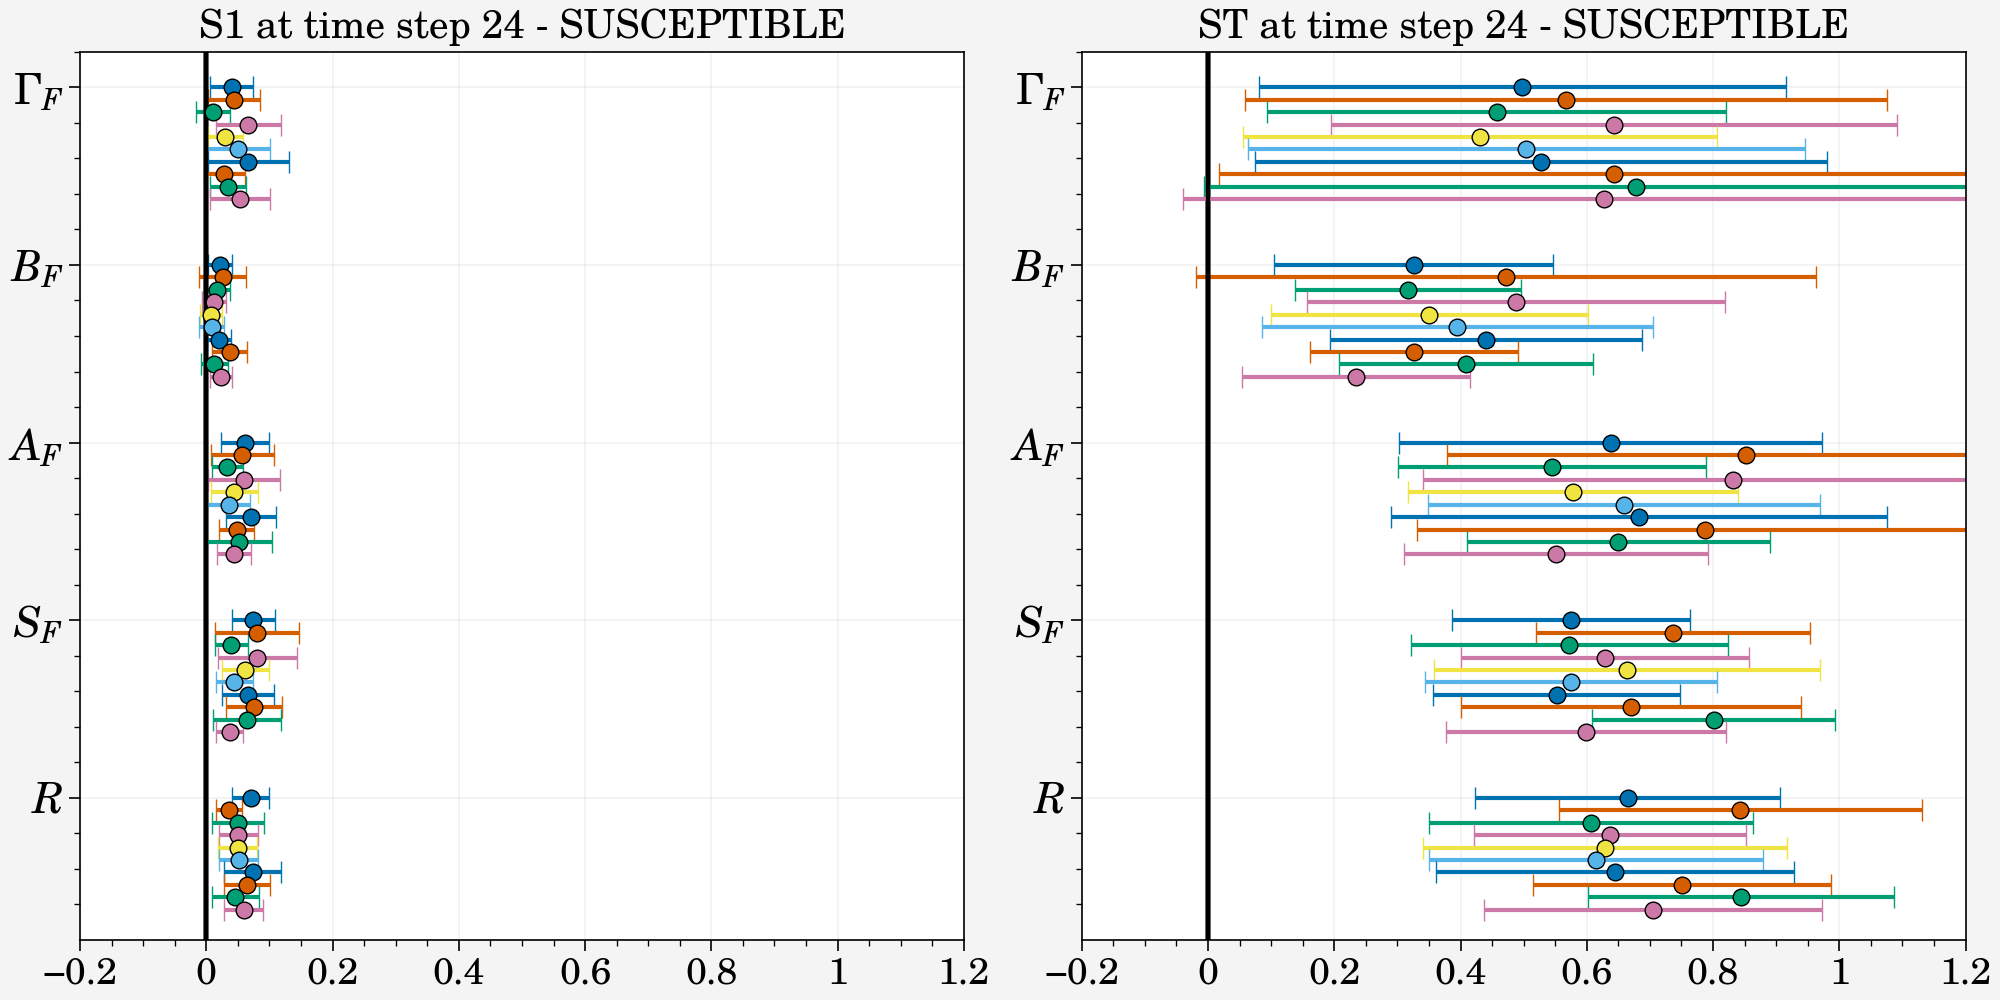

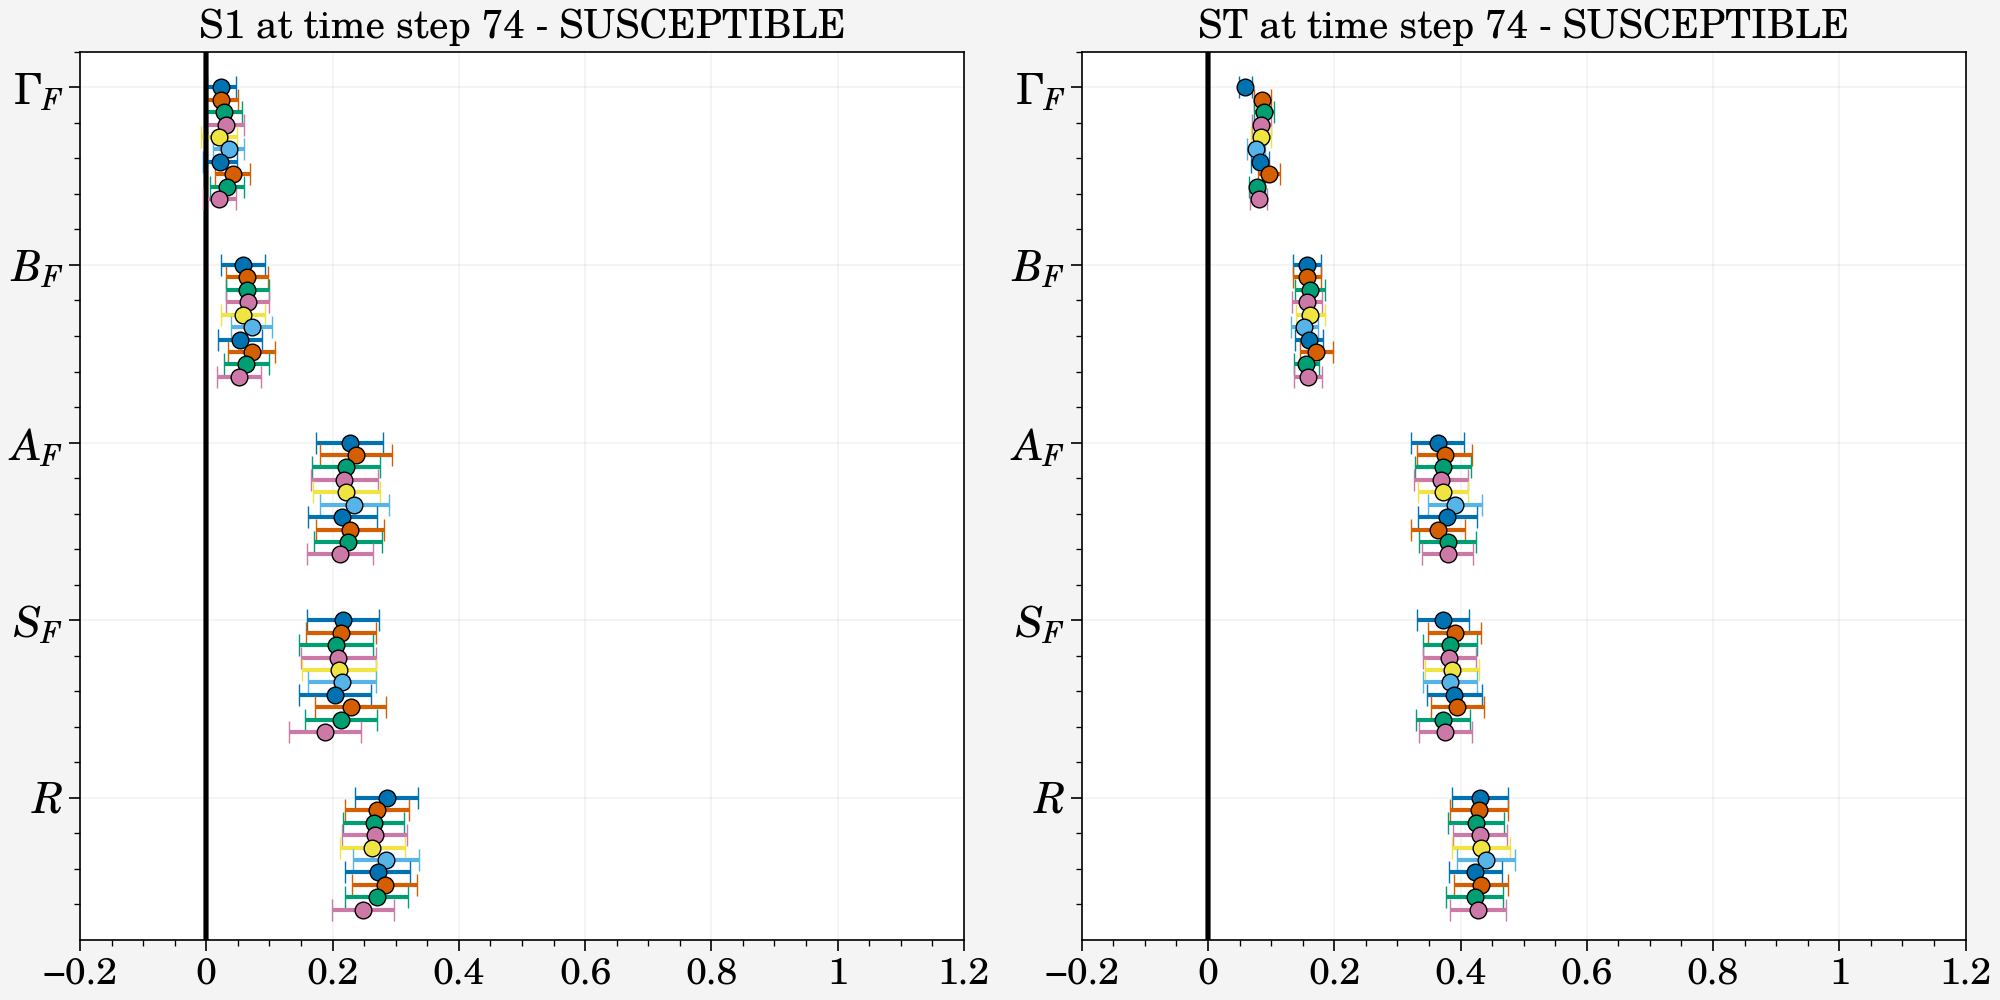

In [42]:
response = 'SUSCEPTIBLE'

for ts in timesteps:
    plot_multiple_res_multiple_ts(response, ts)

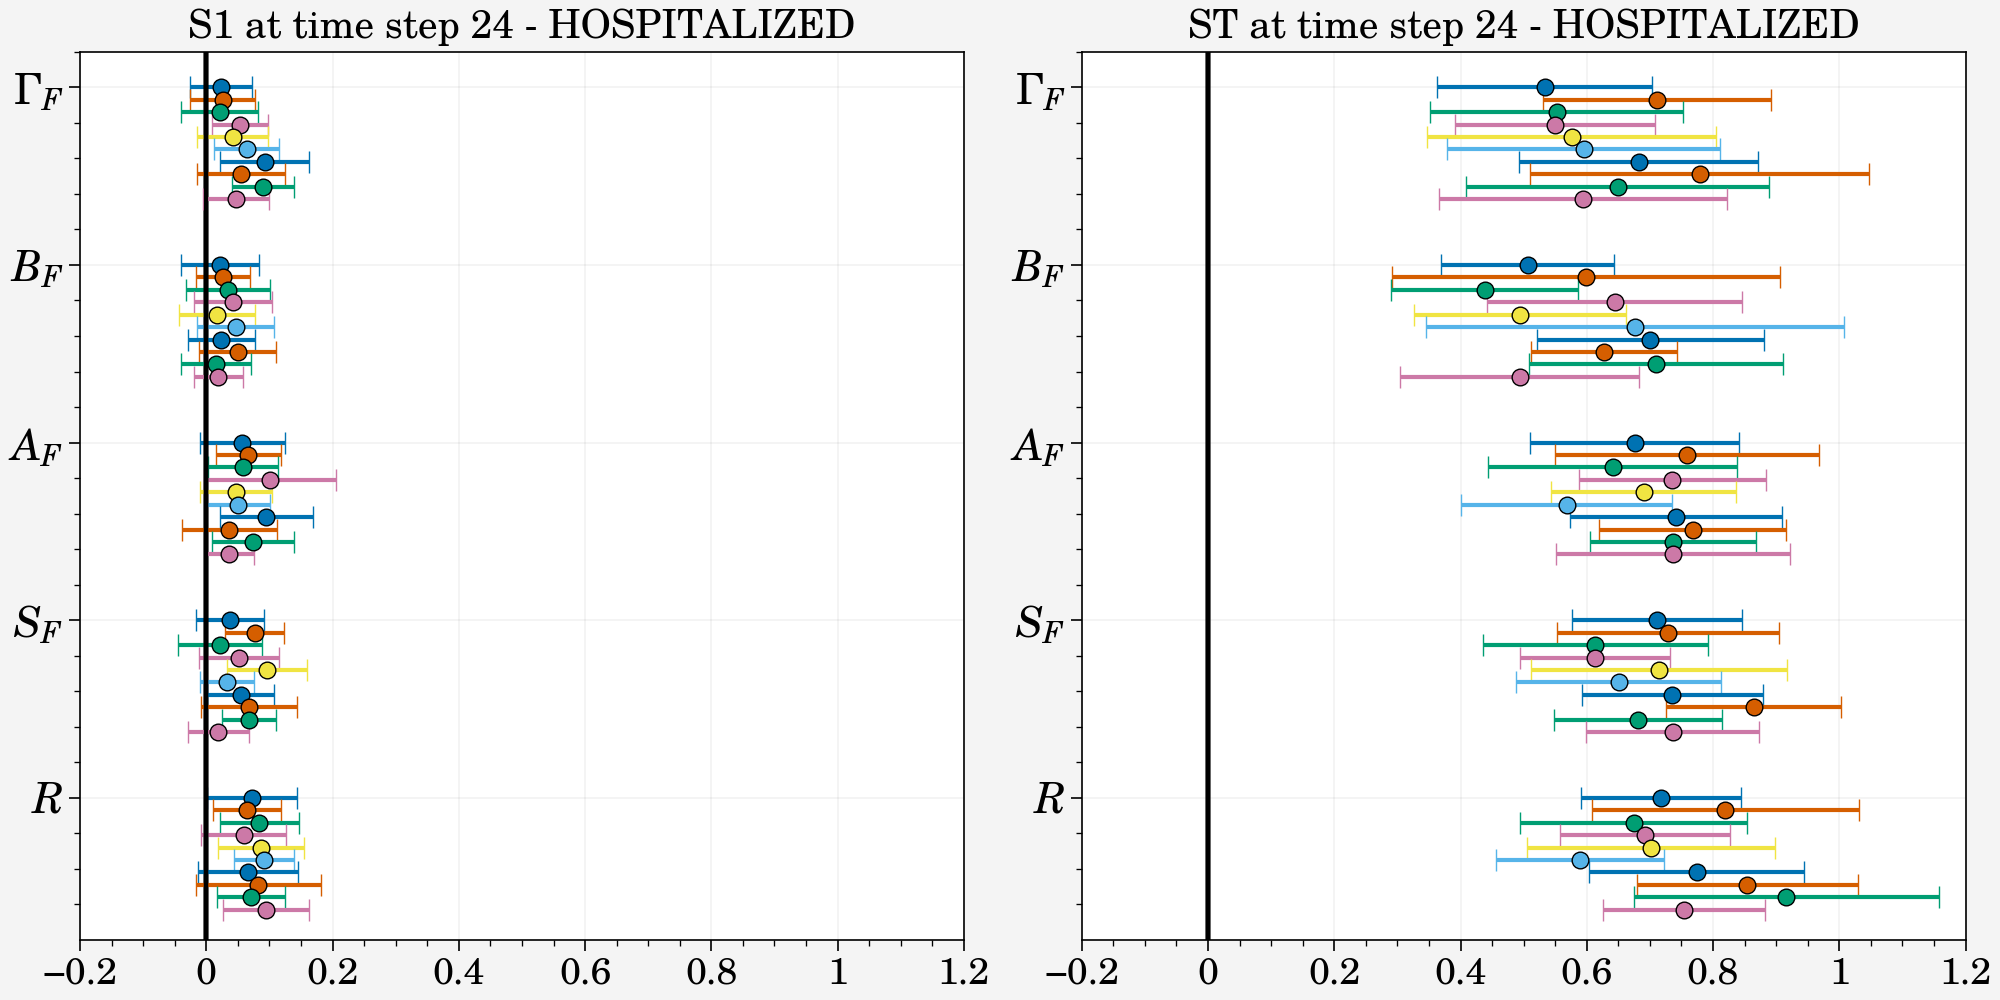

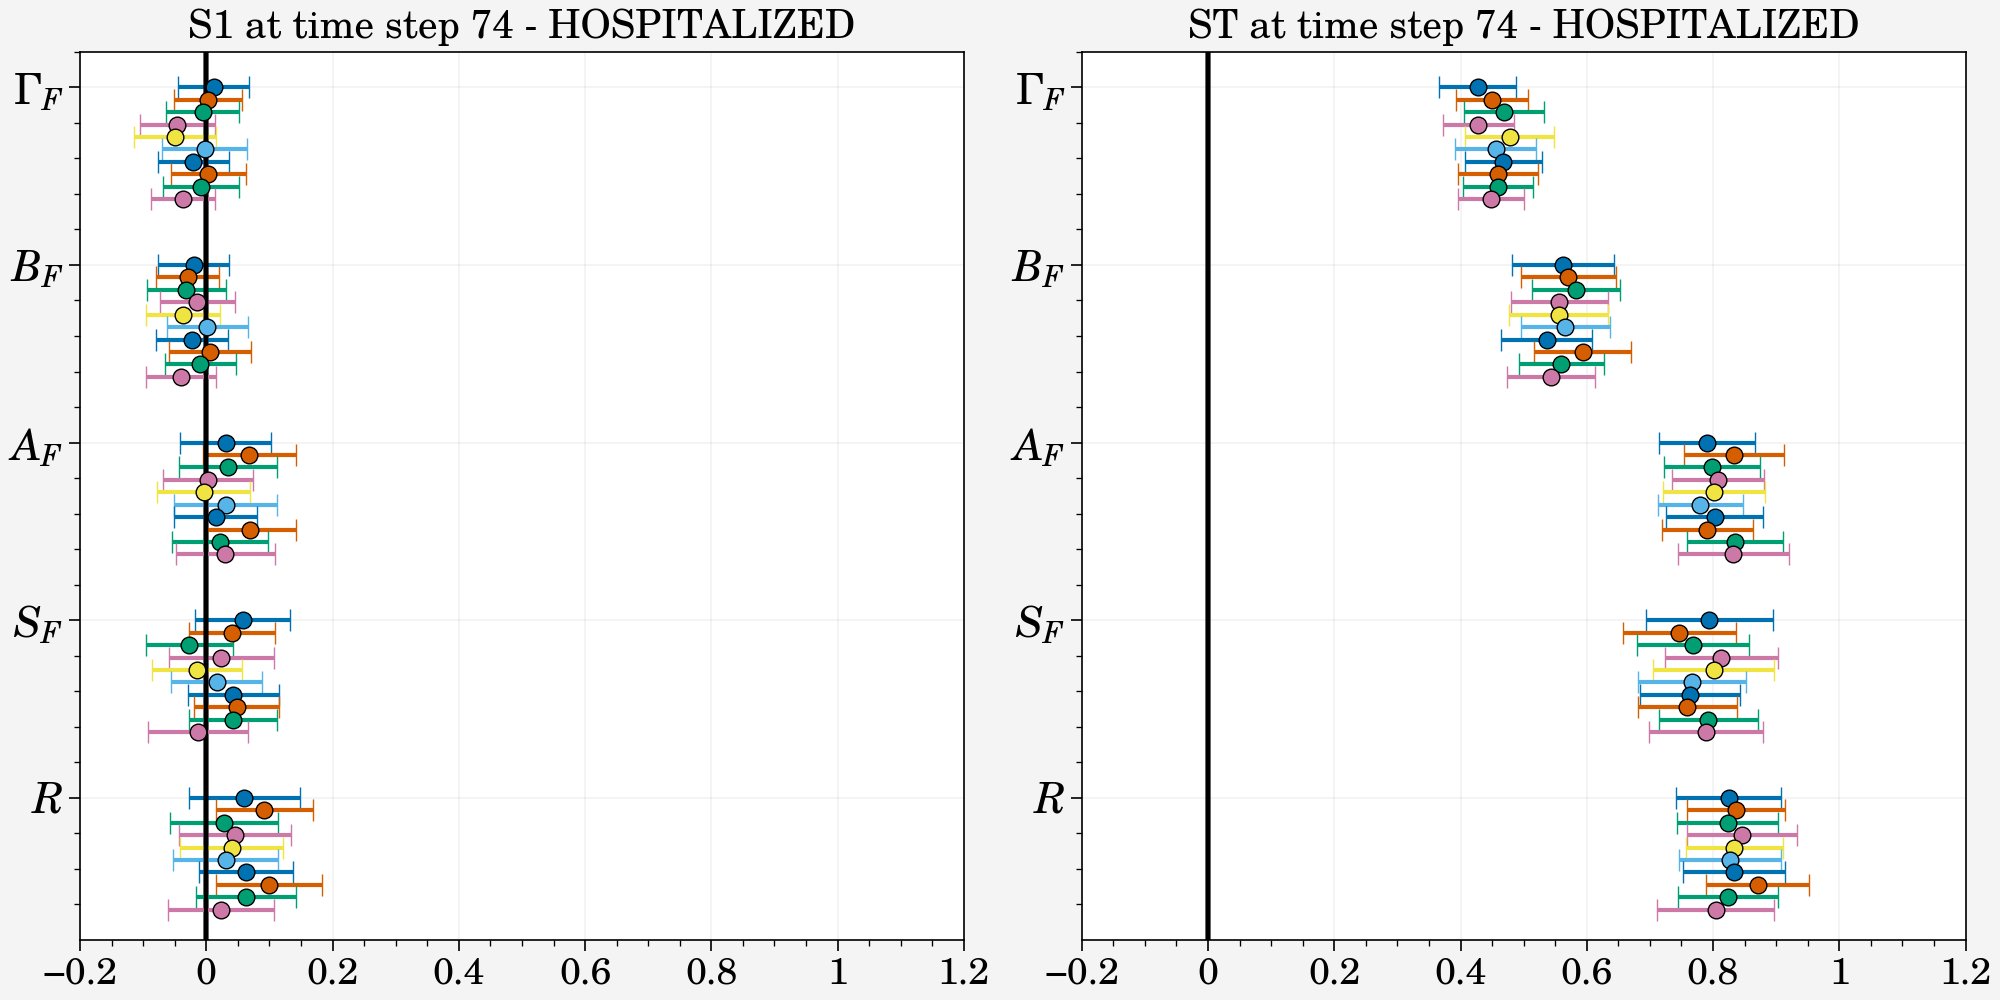

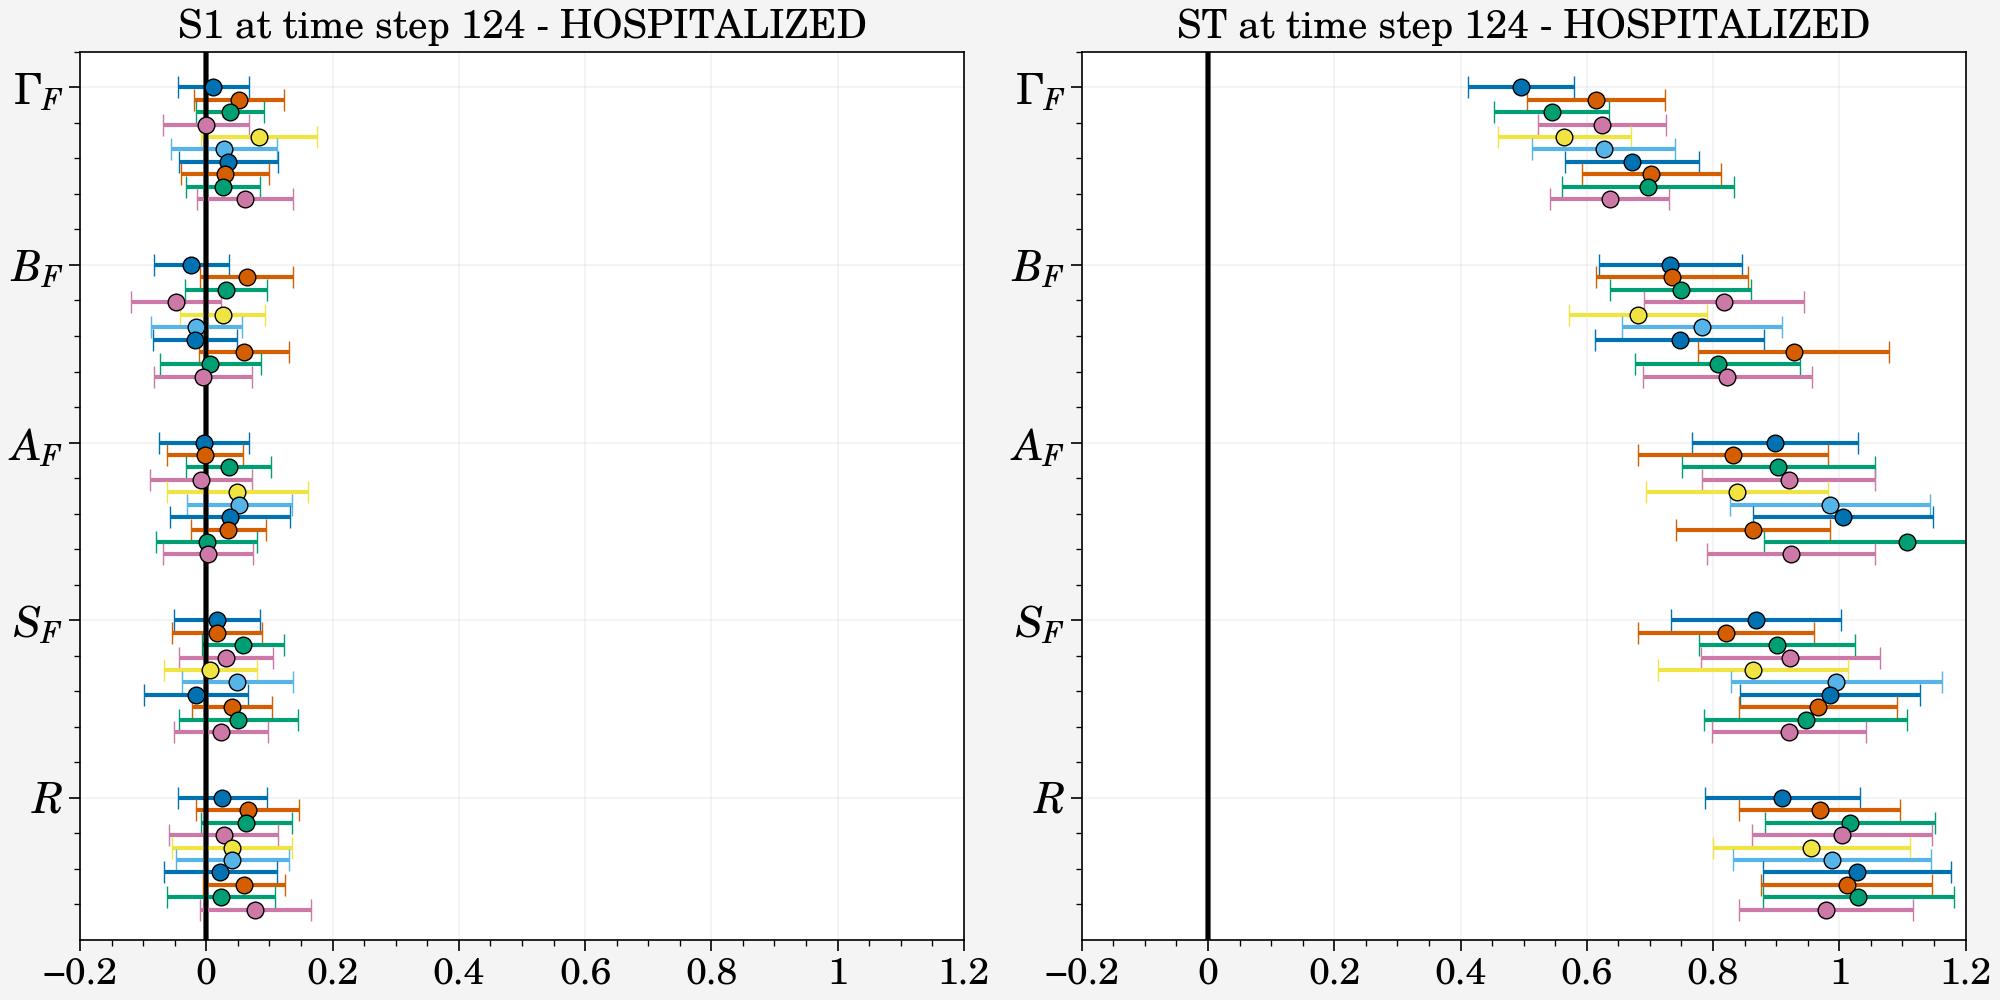

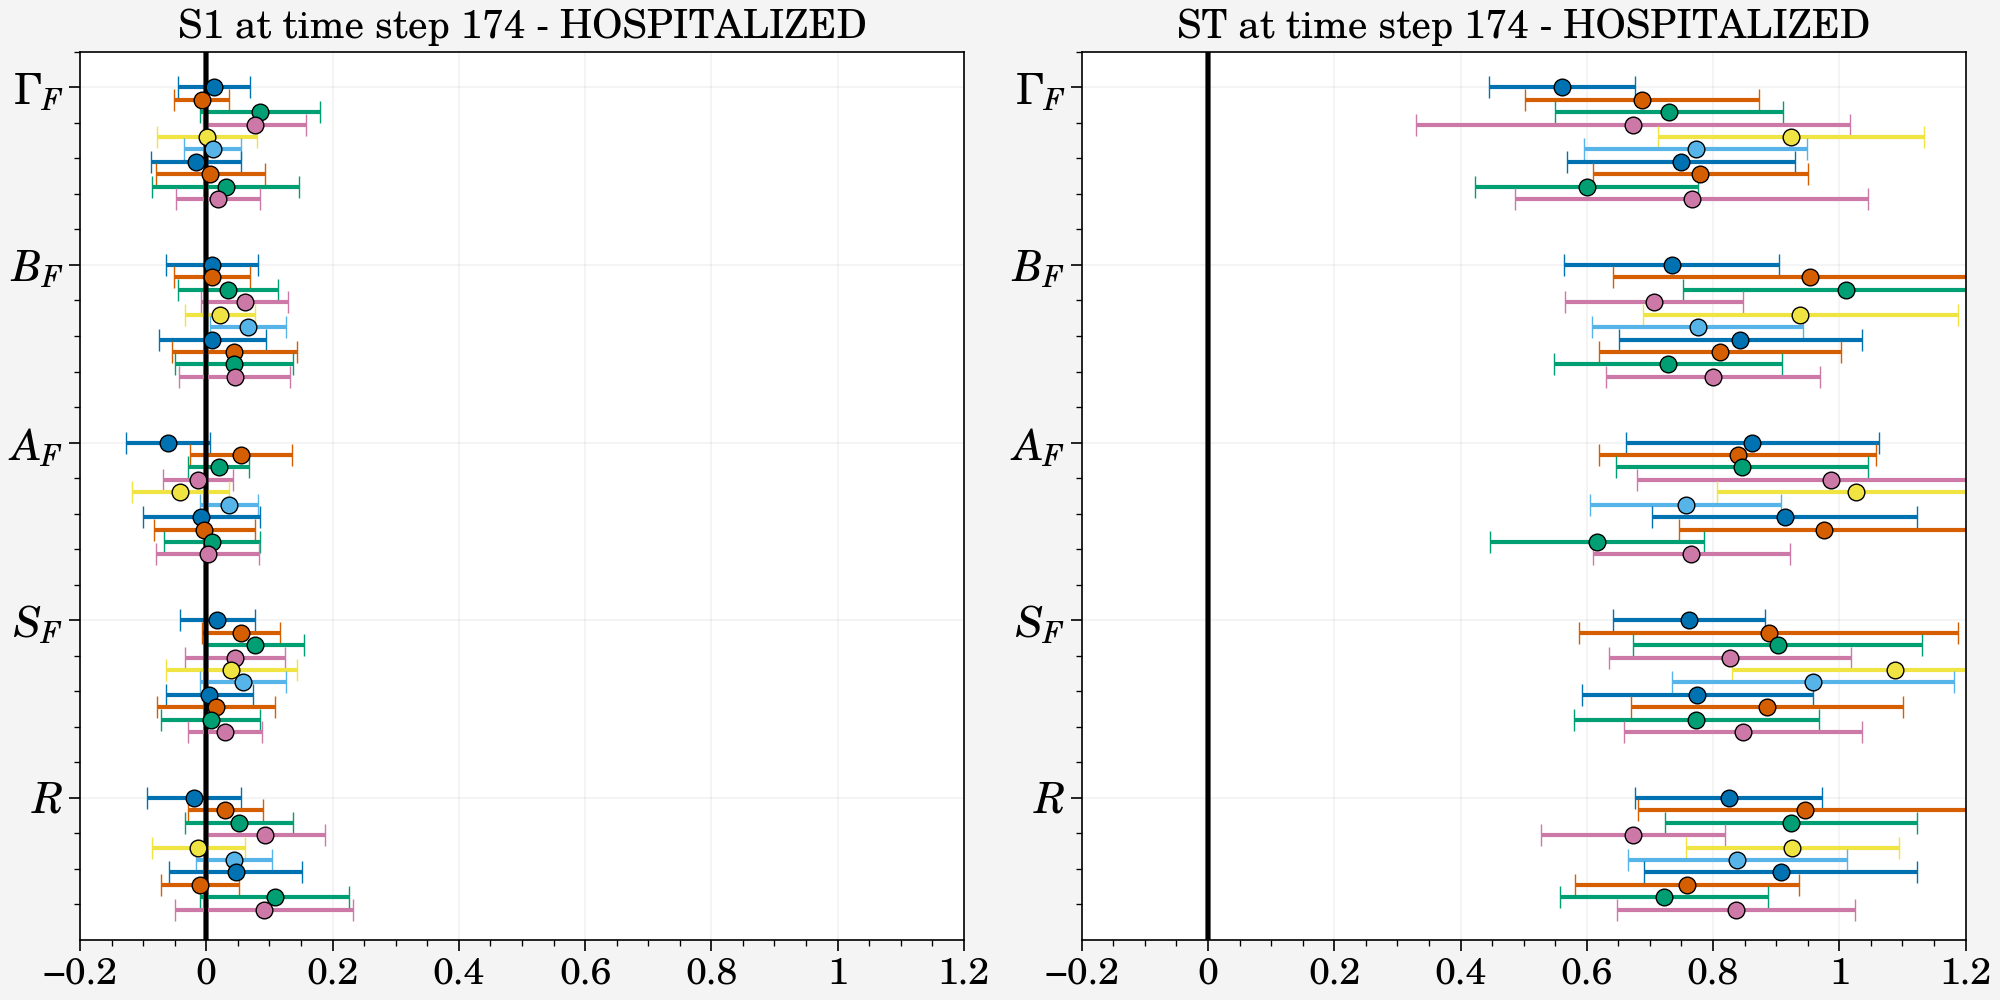

In [43]:
response = 'HOSPITALIZED'

for ts in timesteps:
    plot_multiple_res_multiple_ts(response, ts)

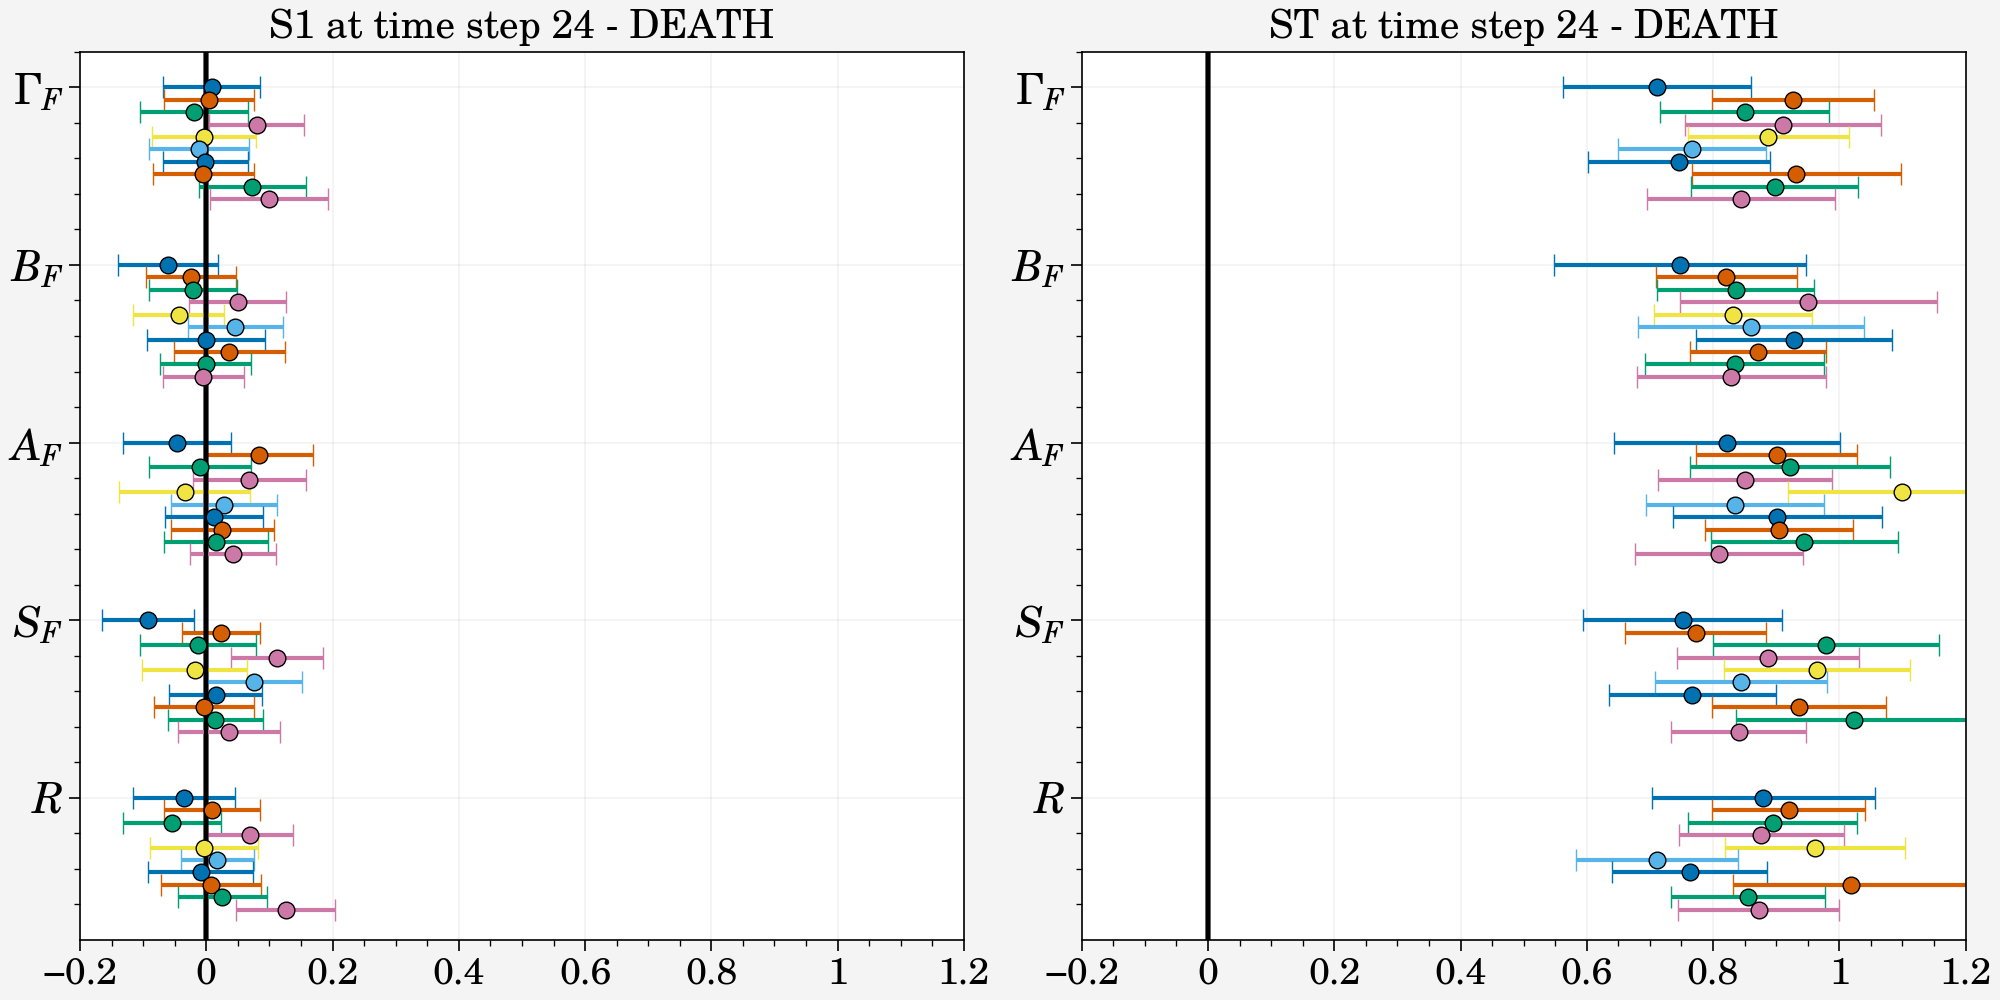

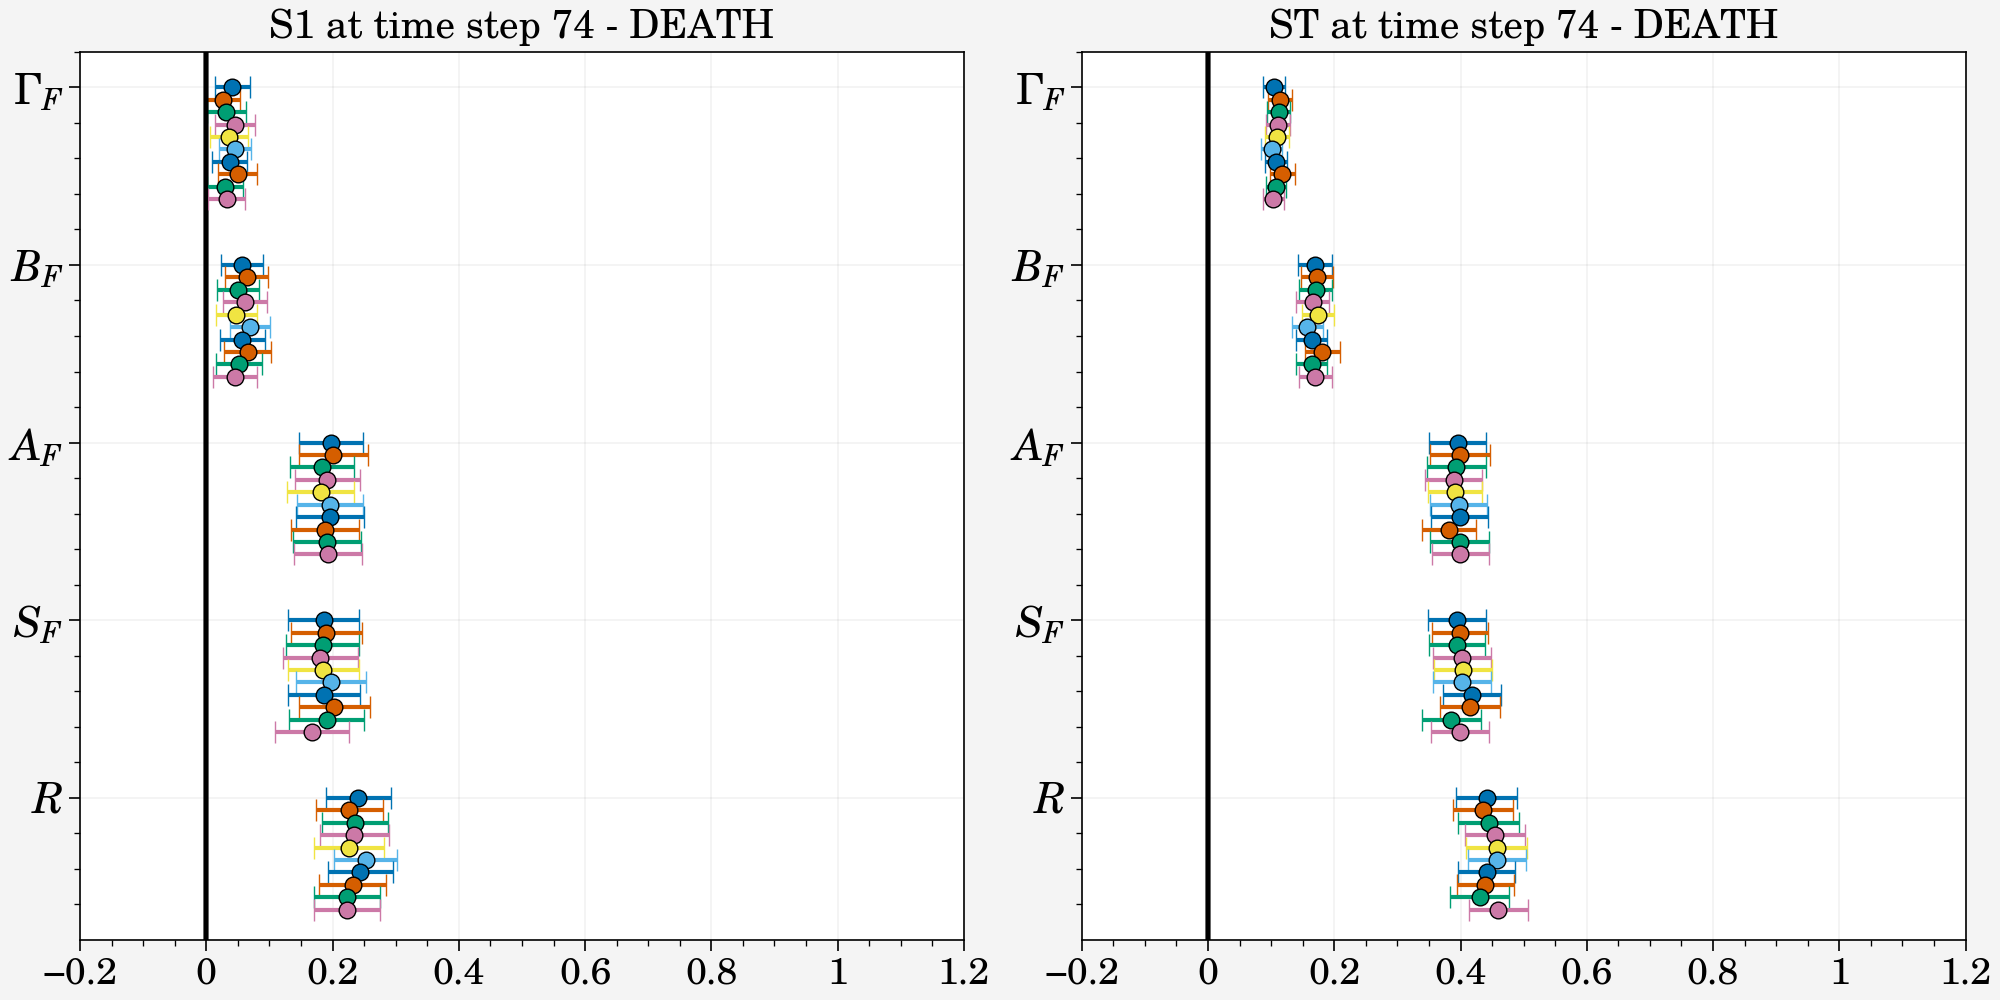

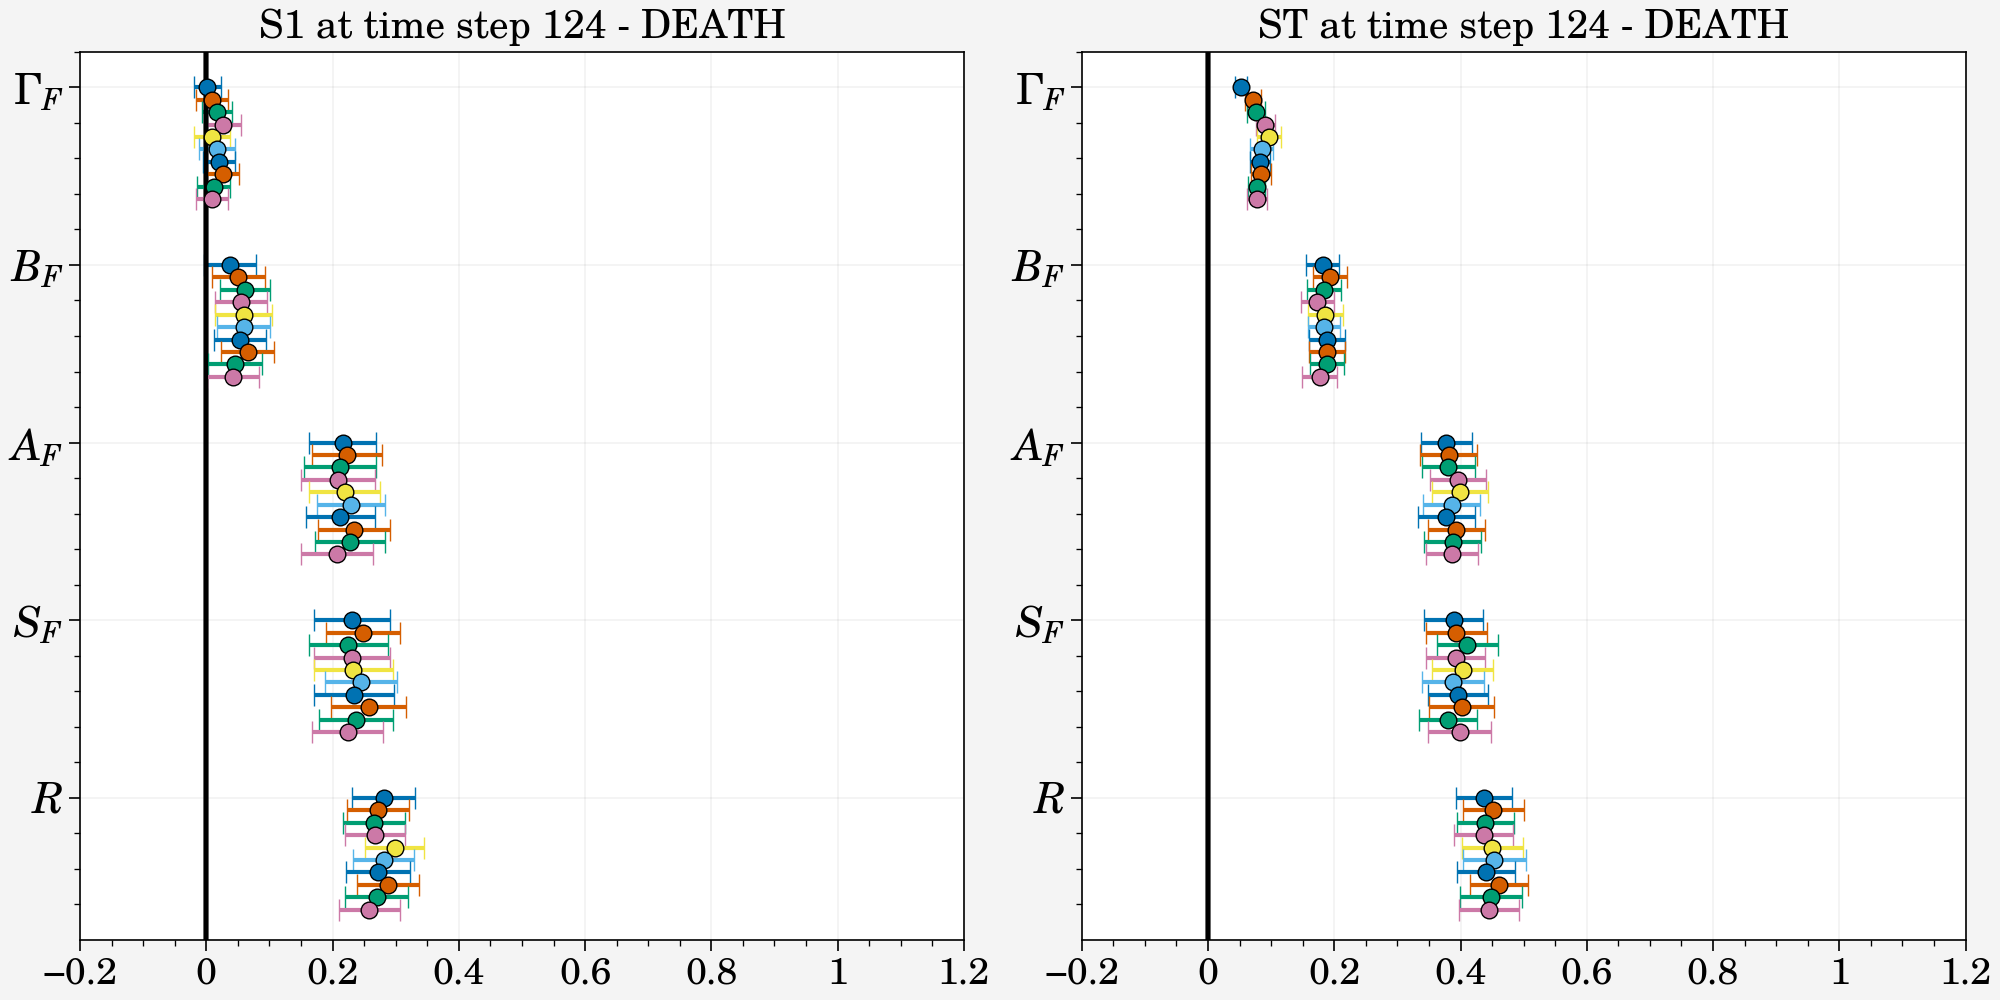

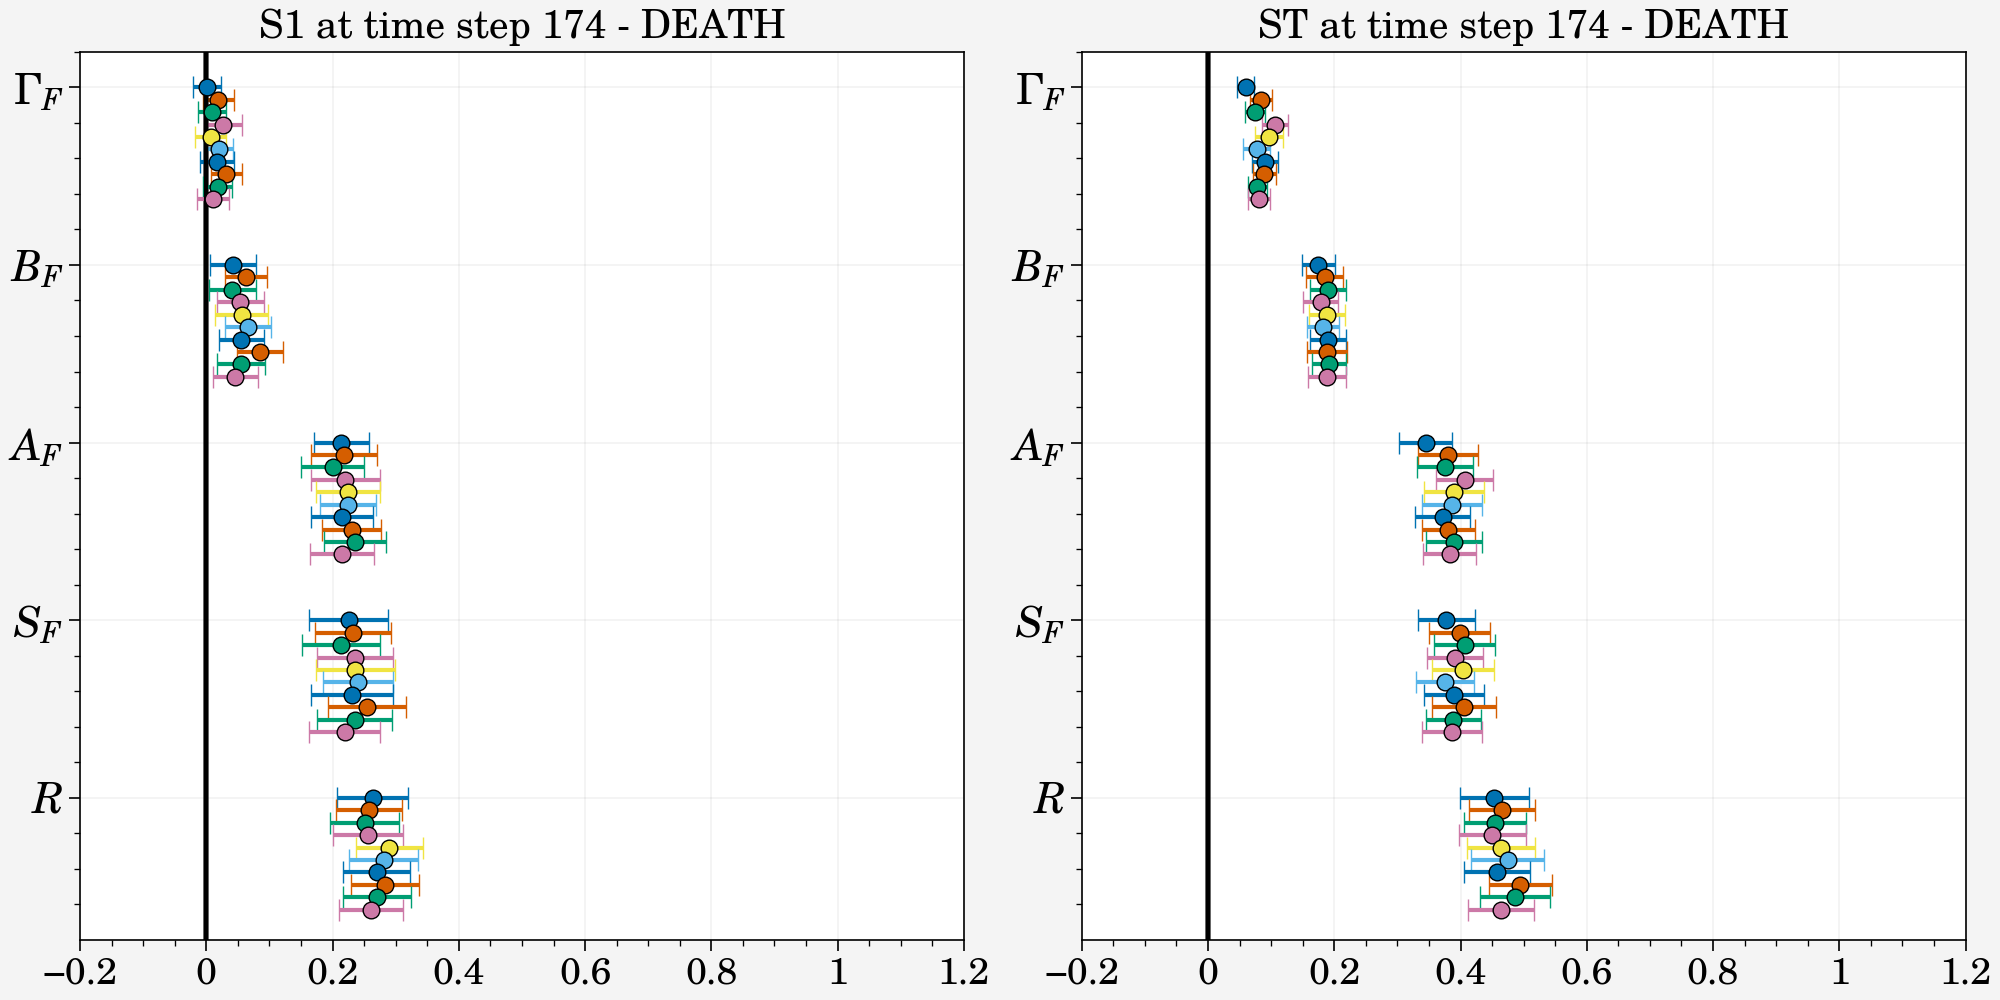

In [44]:
response = 'DEATH'

for ts in timesteps:
    plot_multiple_res_multiple_ts(response, ts)

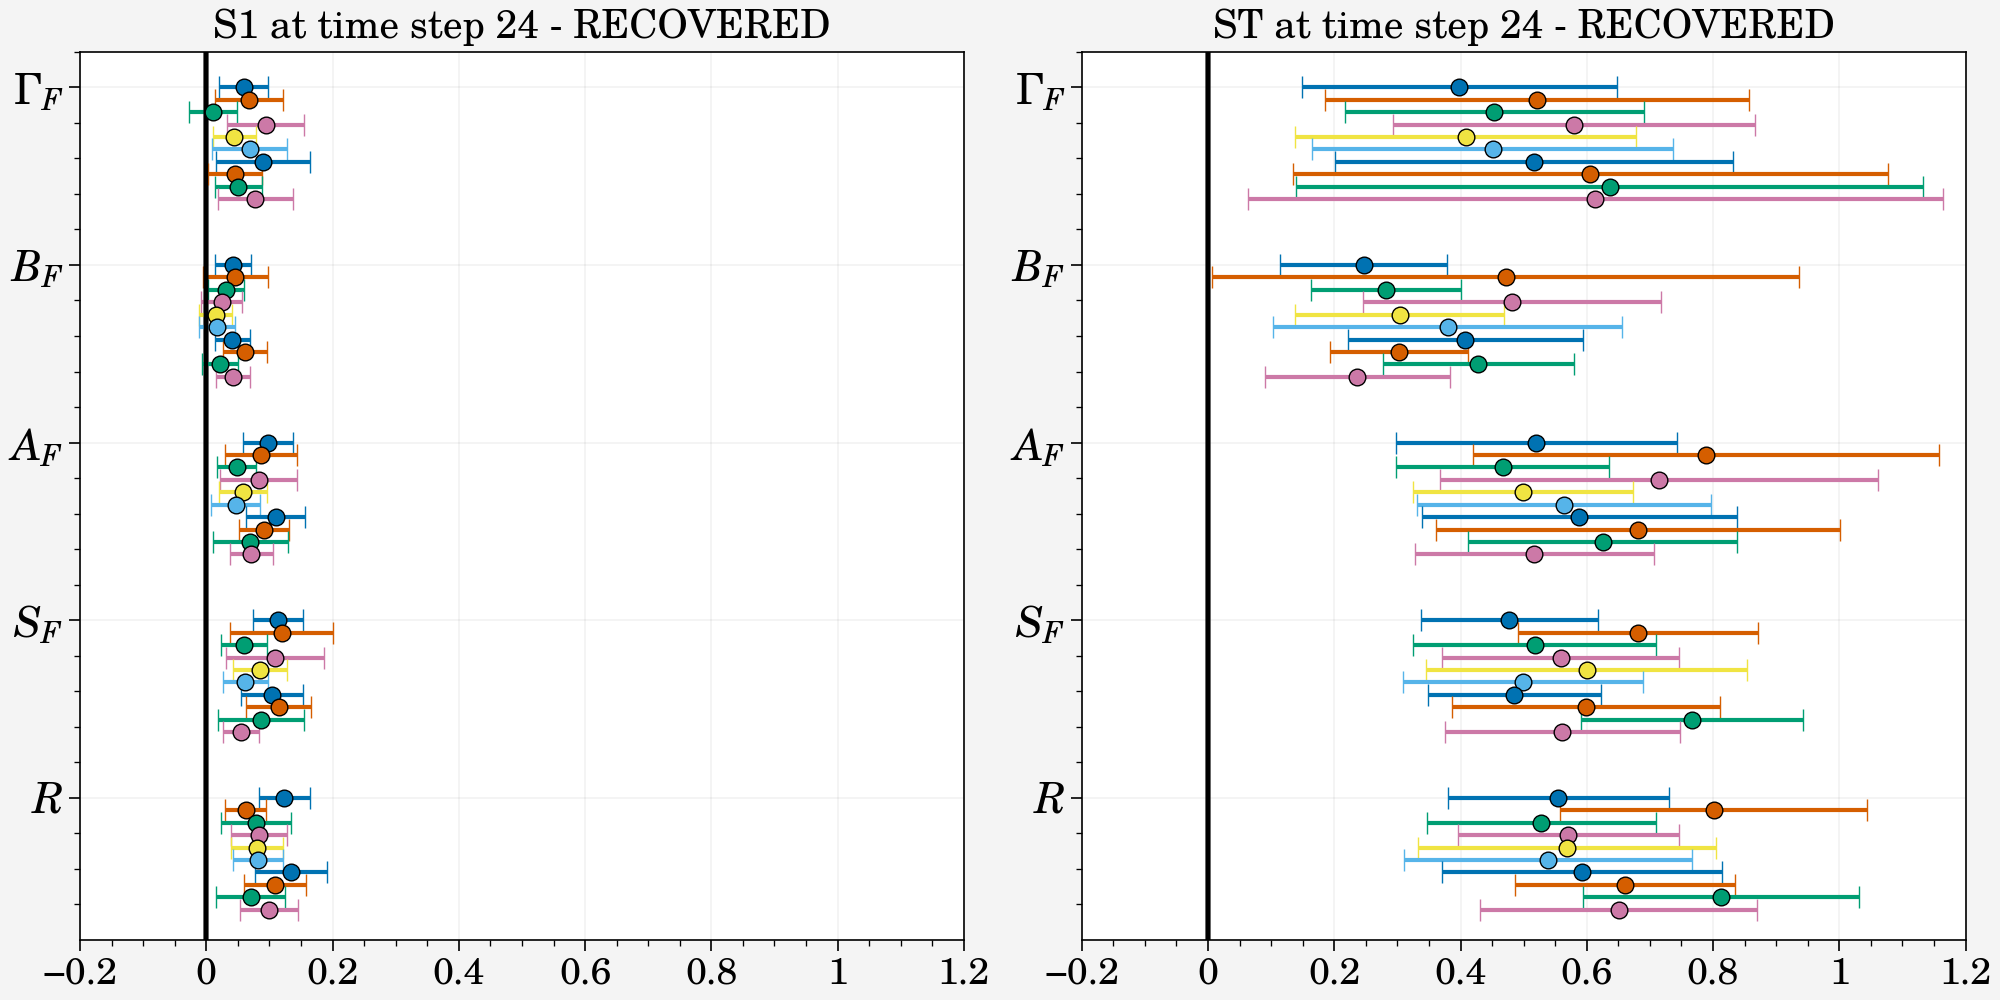

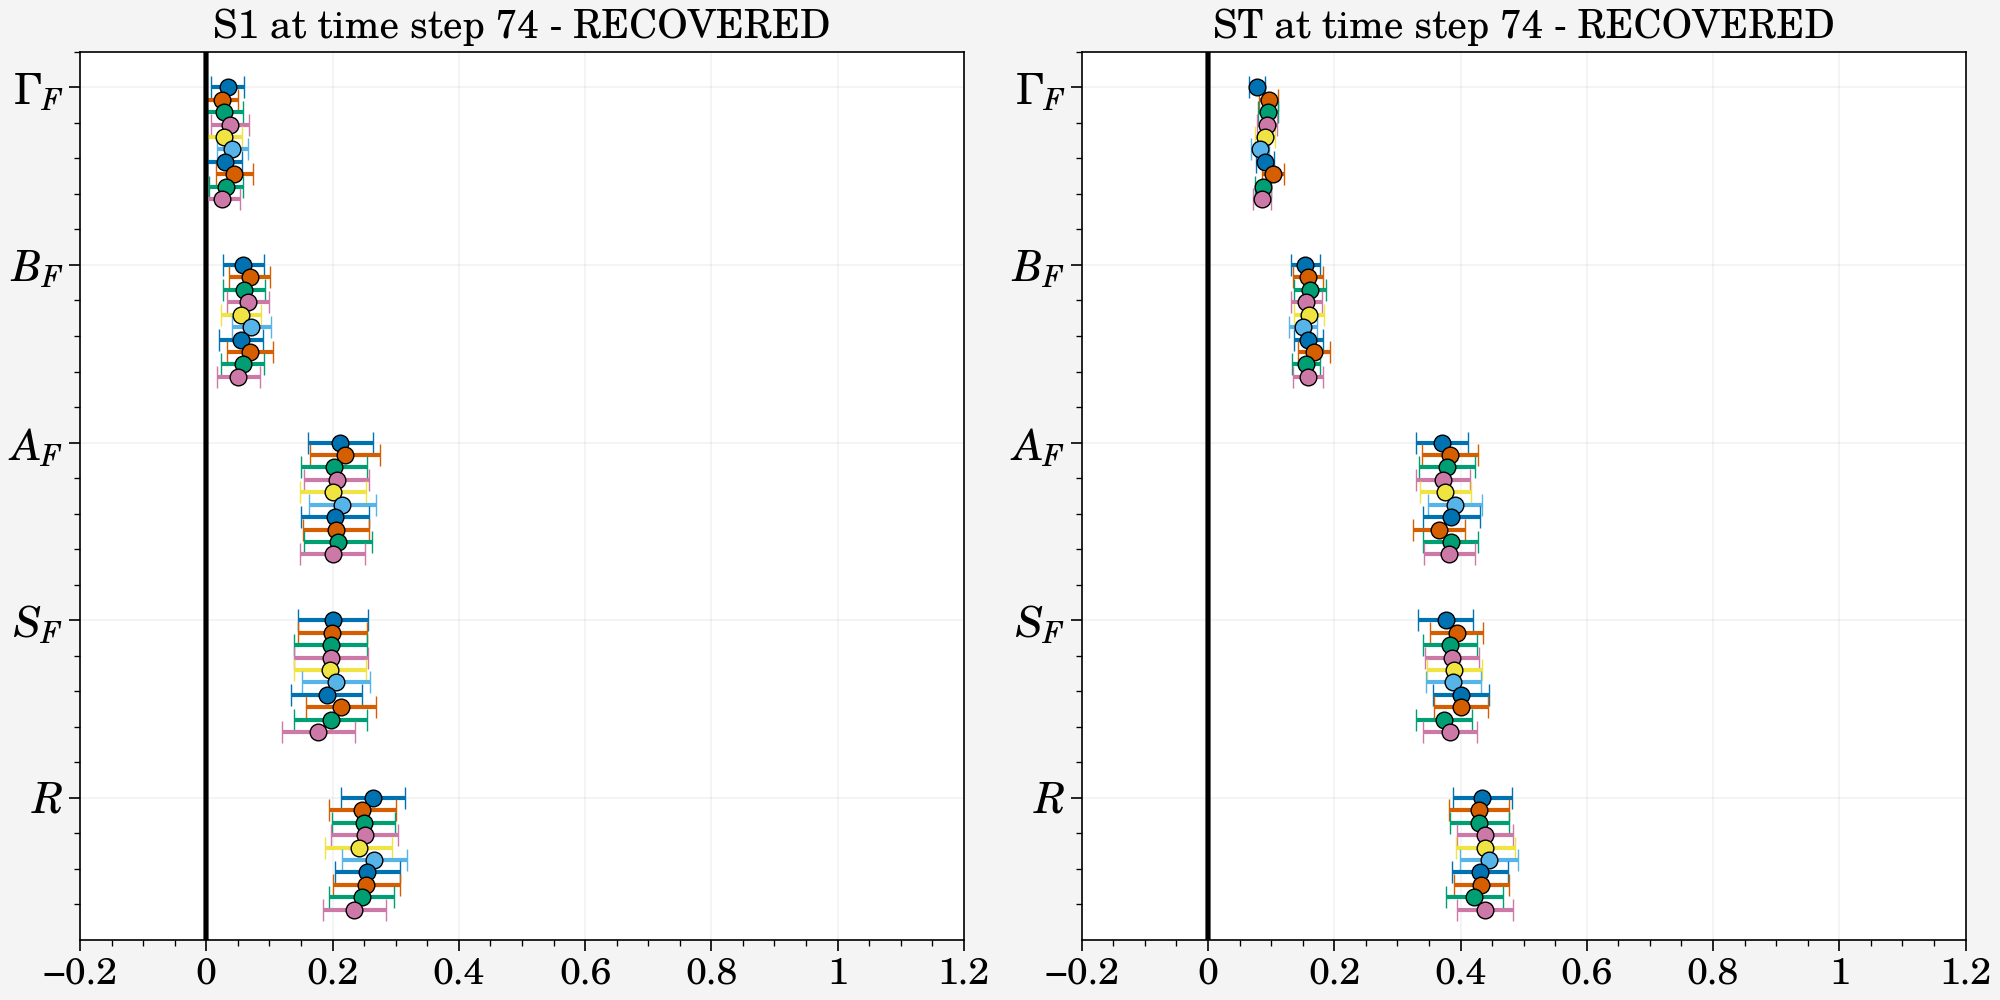

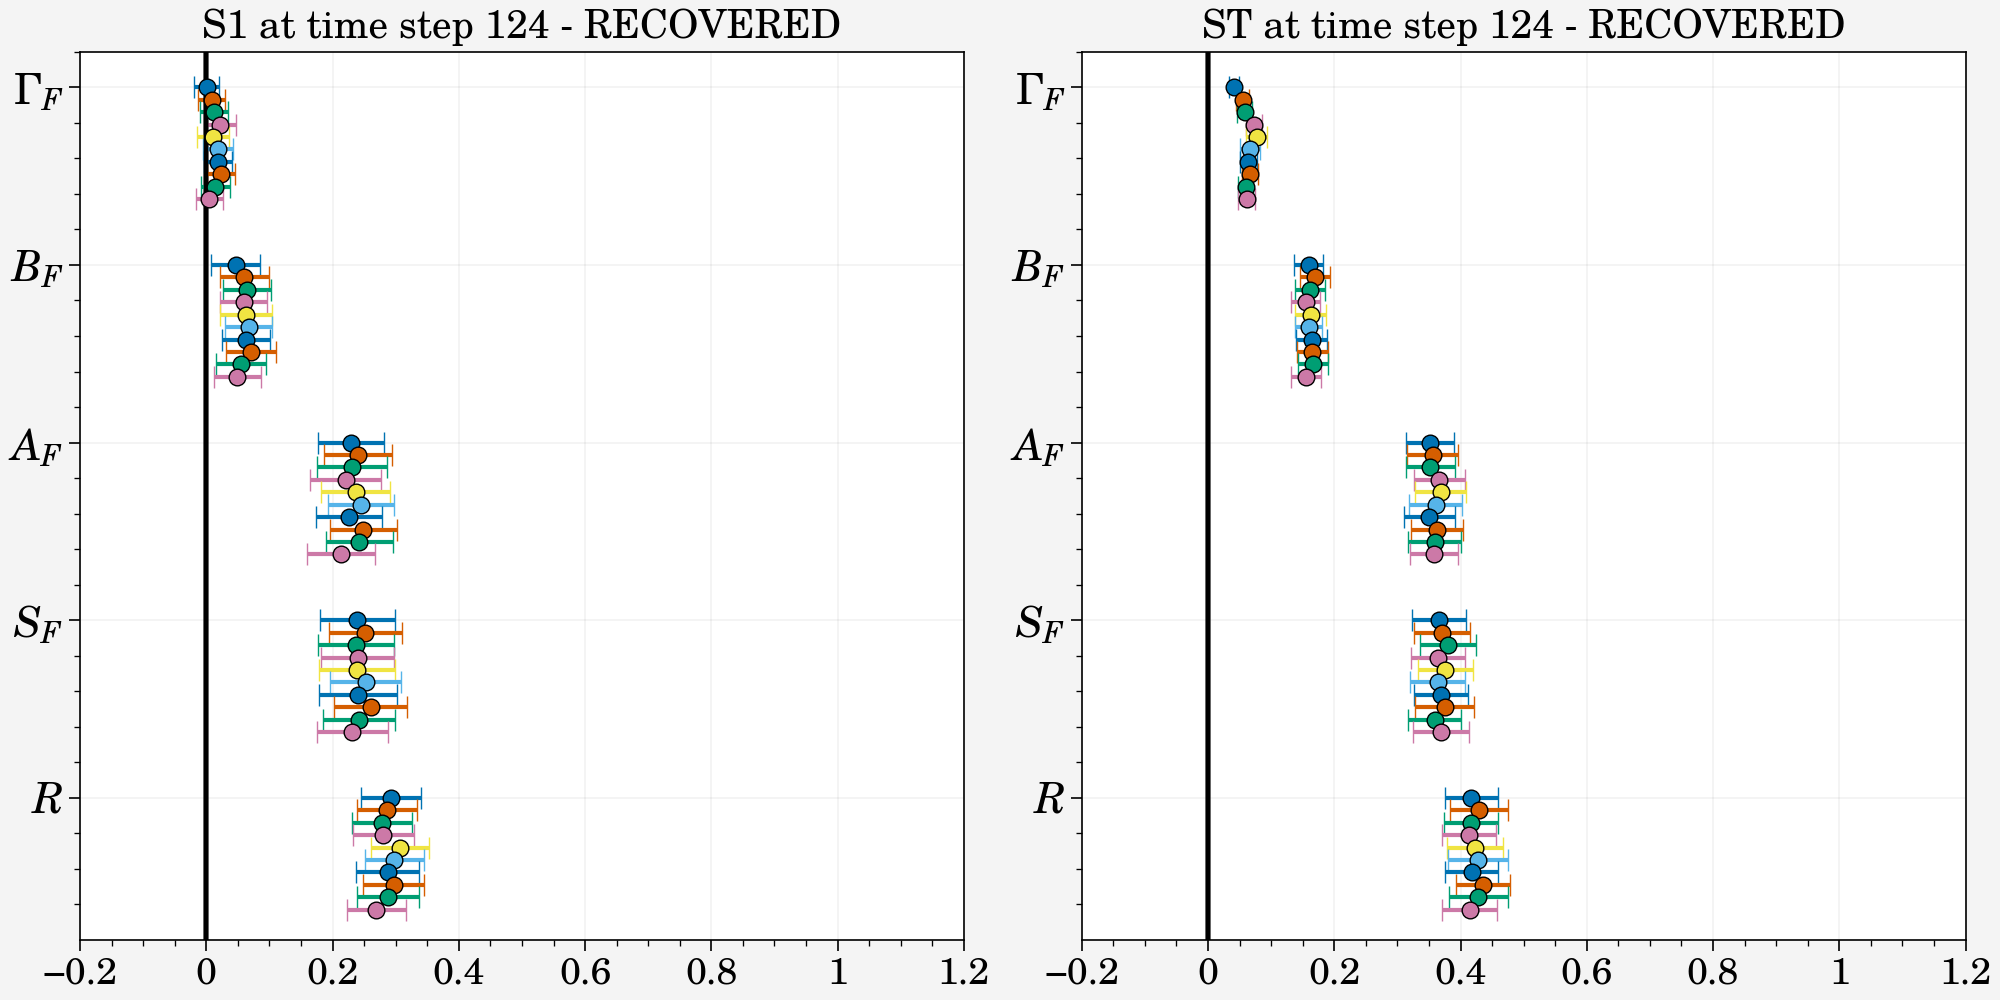

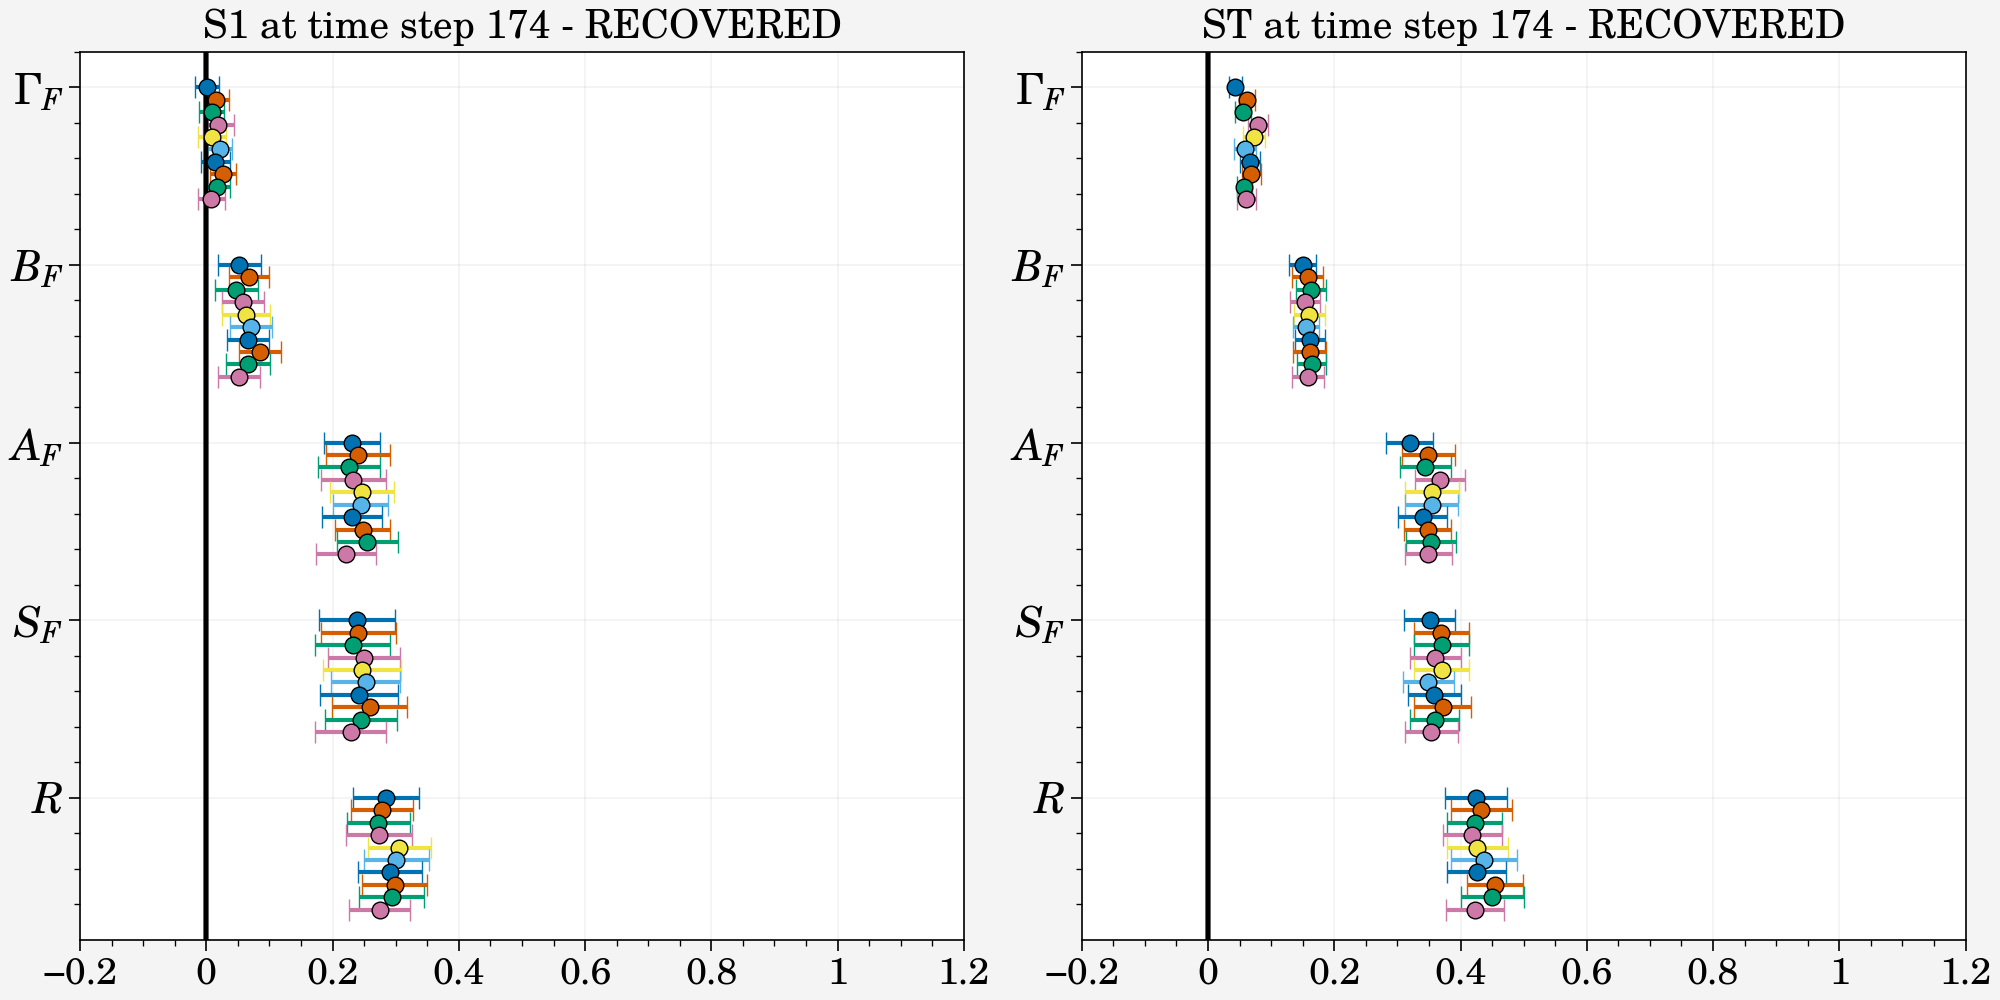

In [45]:
response = 'RECOVERED'

for ts in timesteps:
    plot_multiple_res_multiple_ts(response, ts)

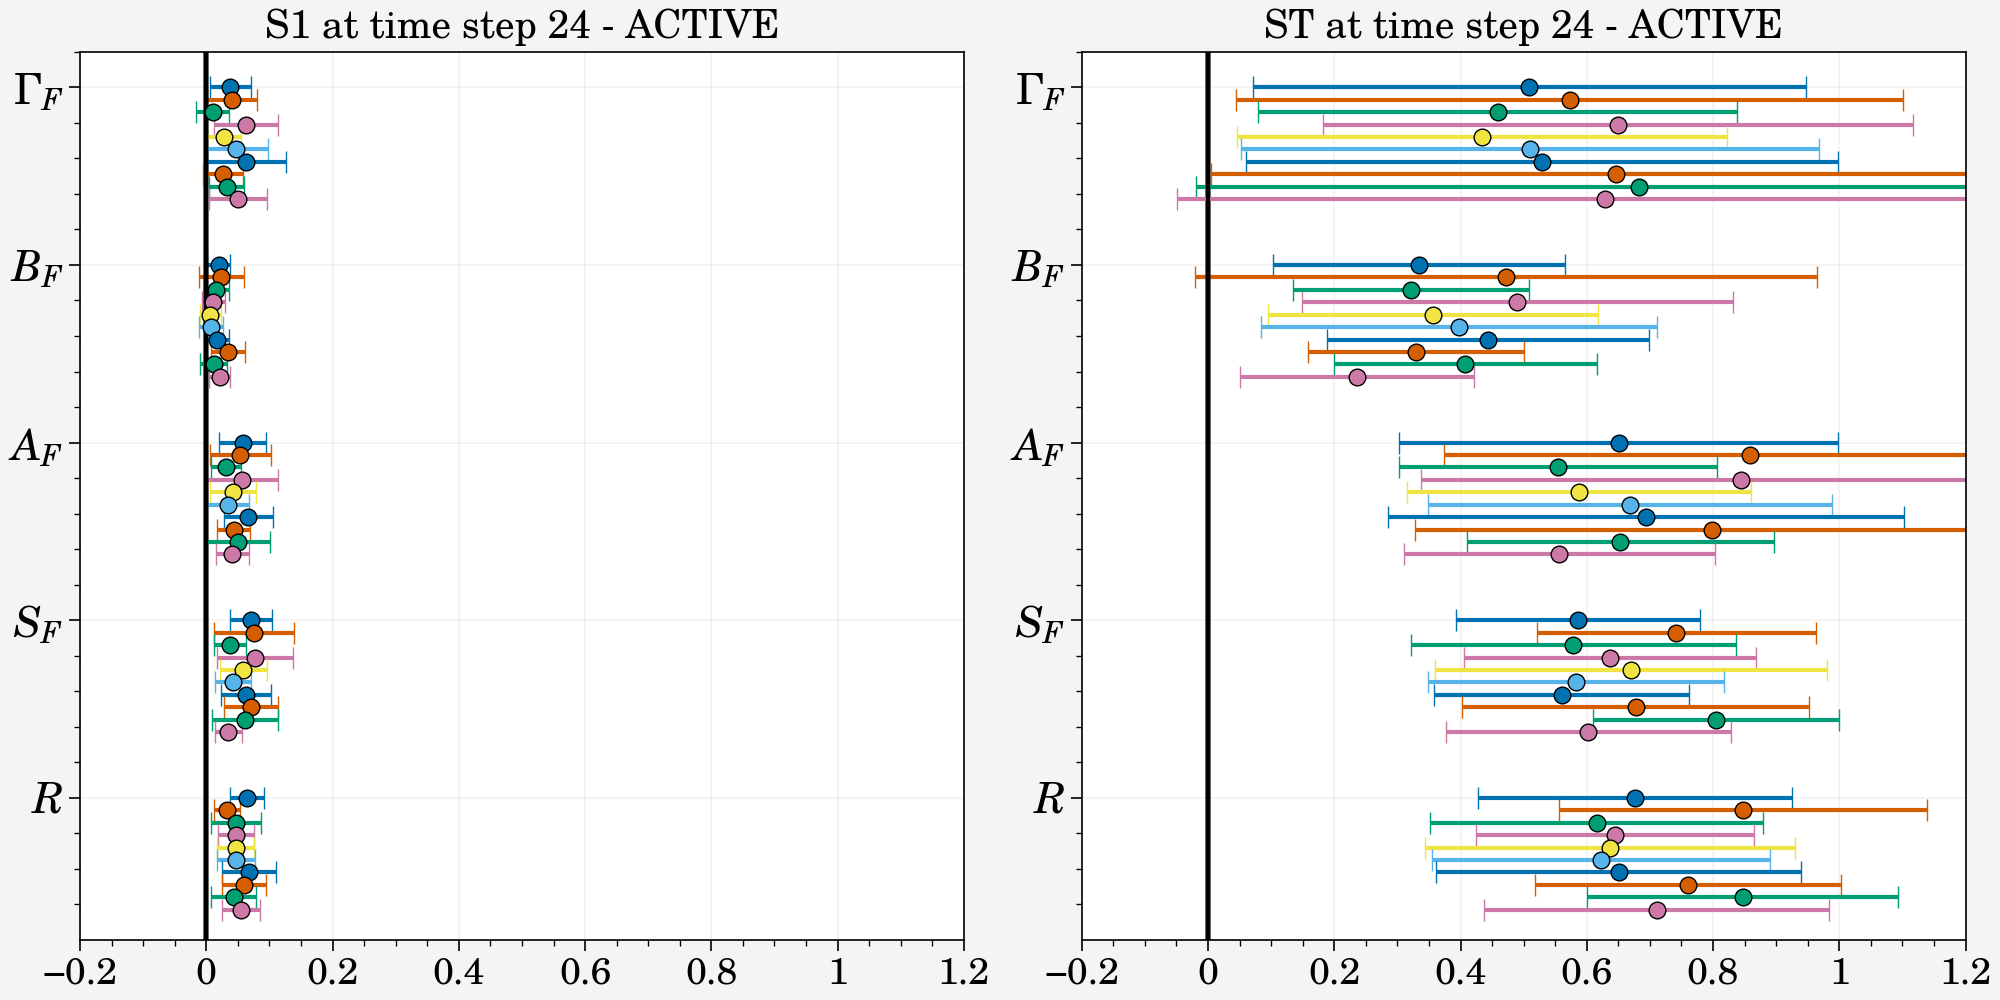

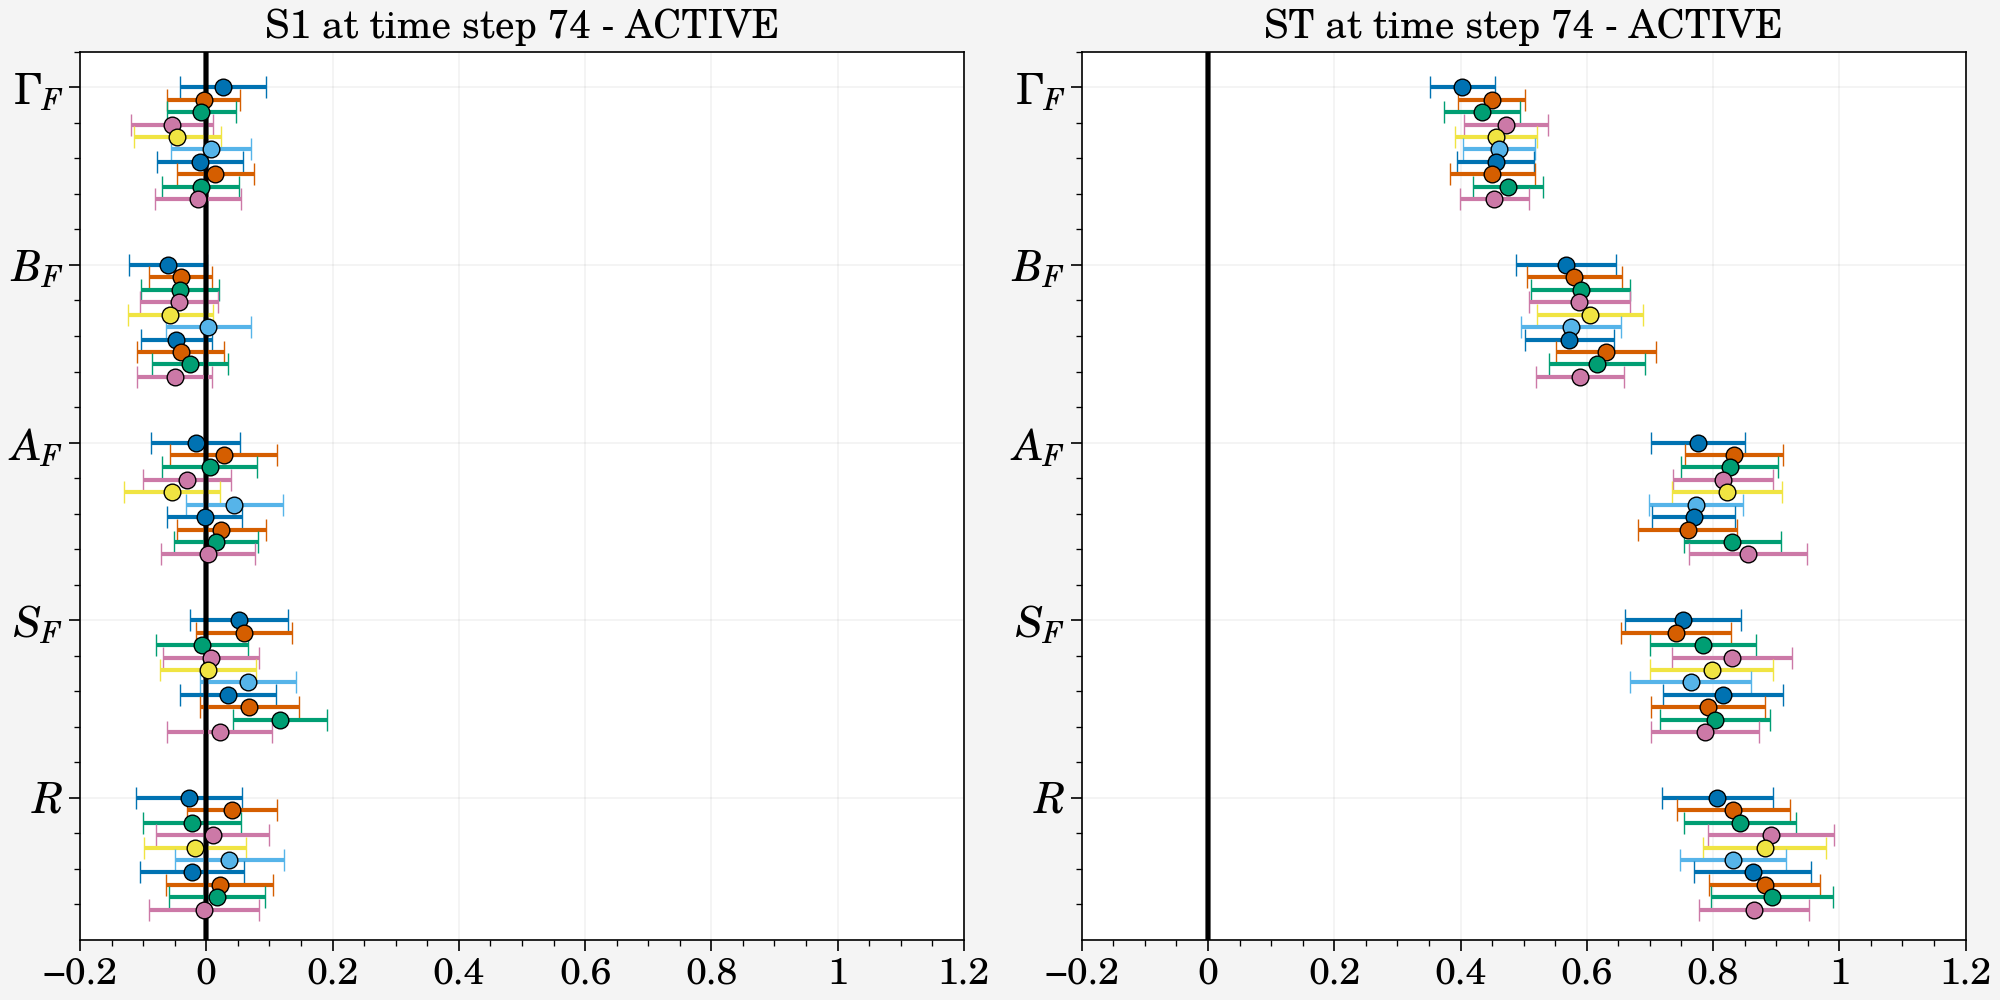

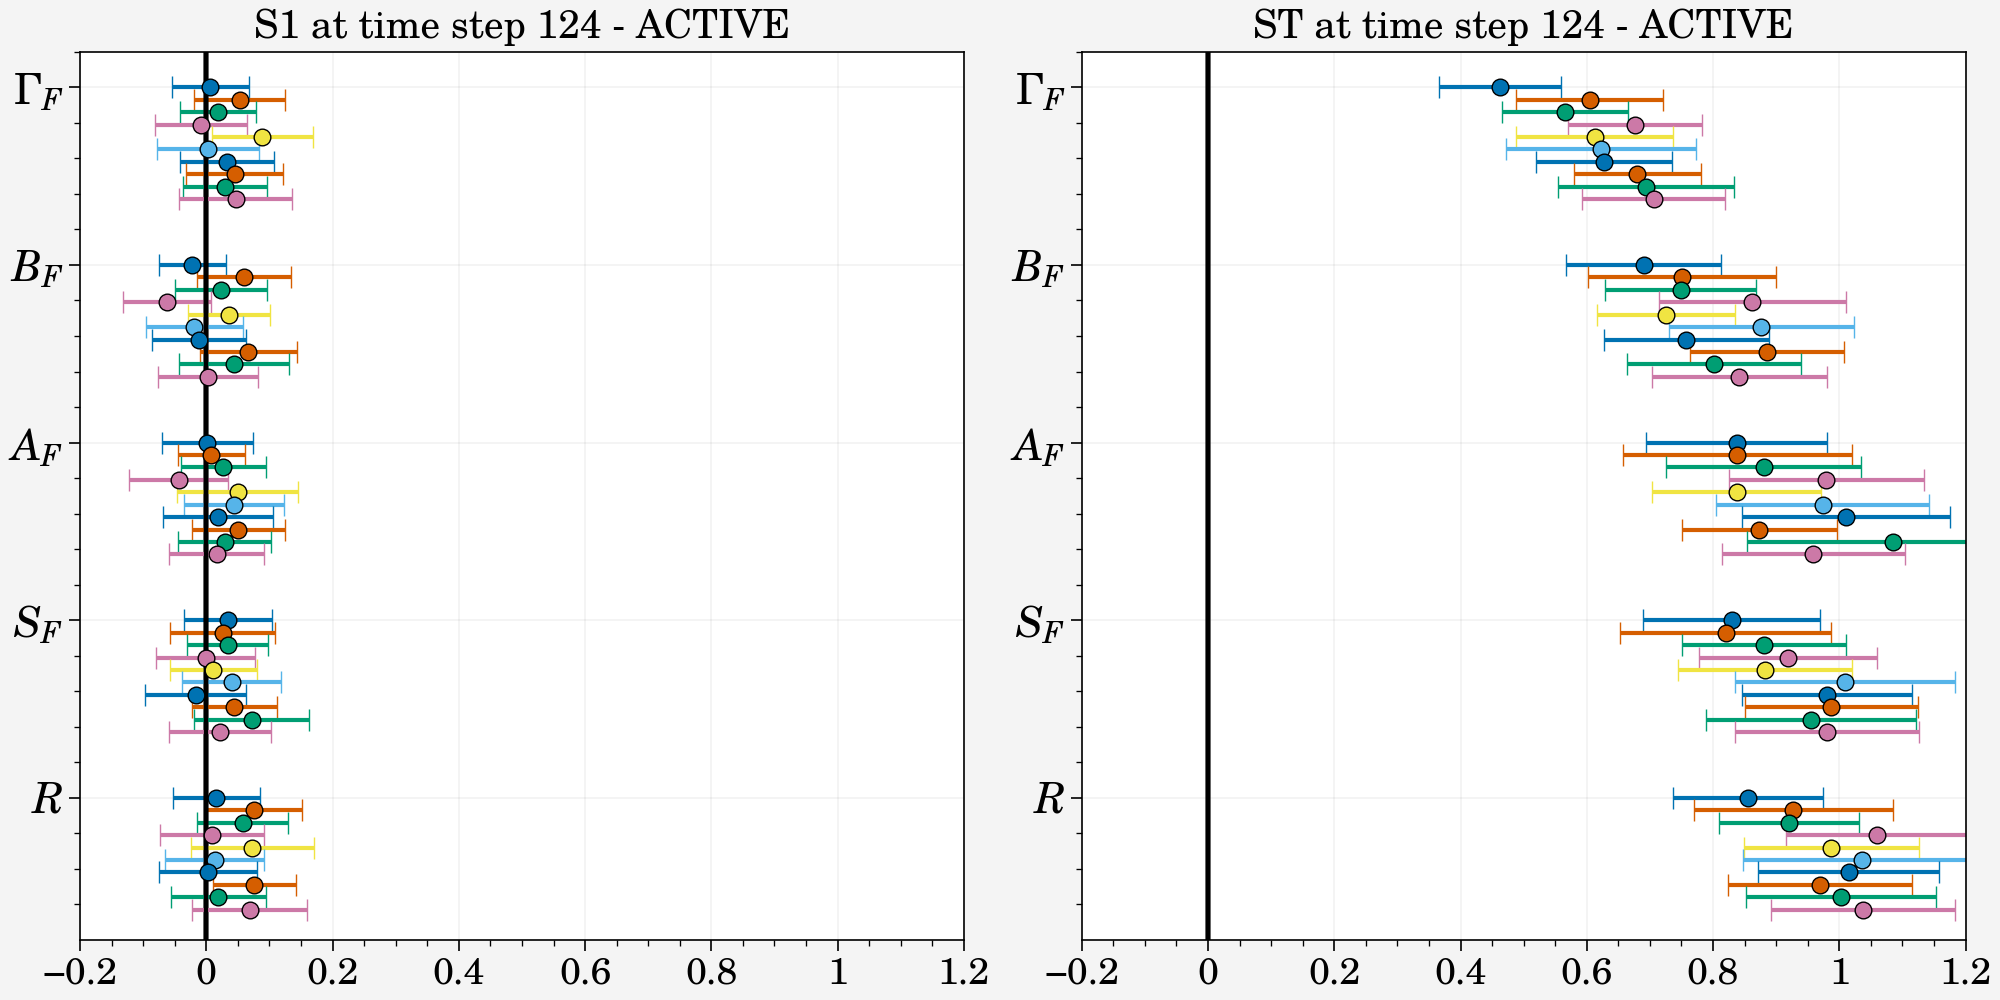

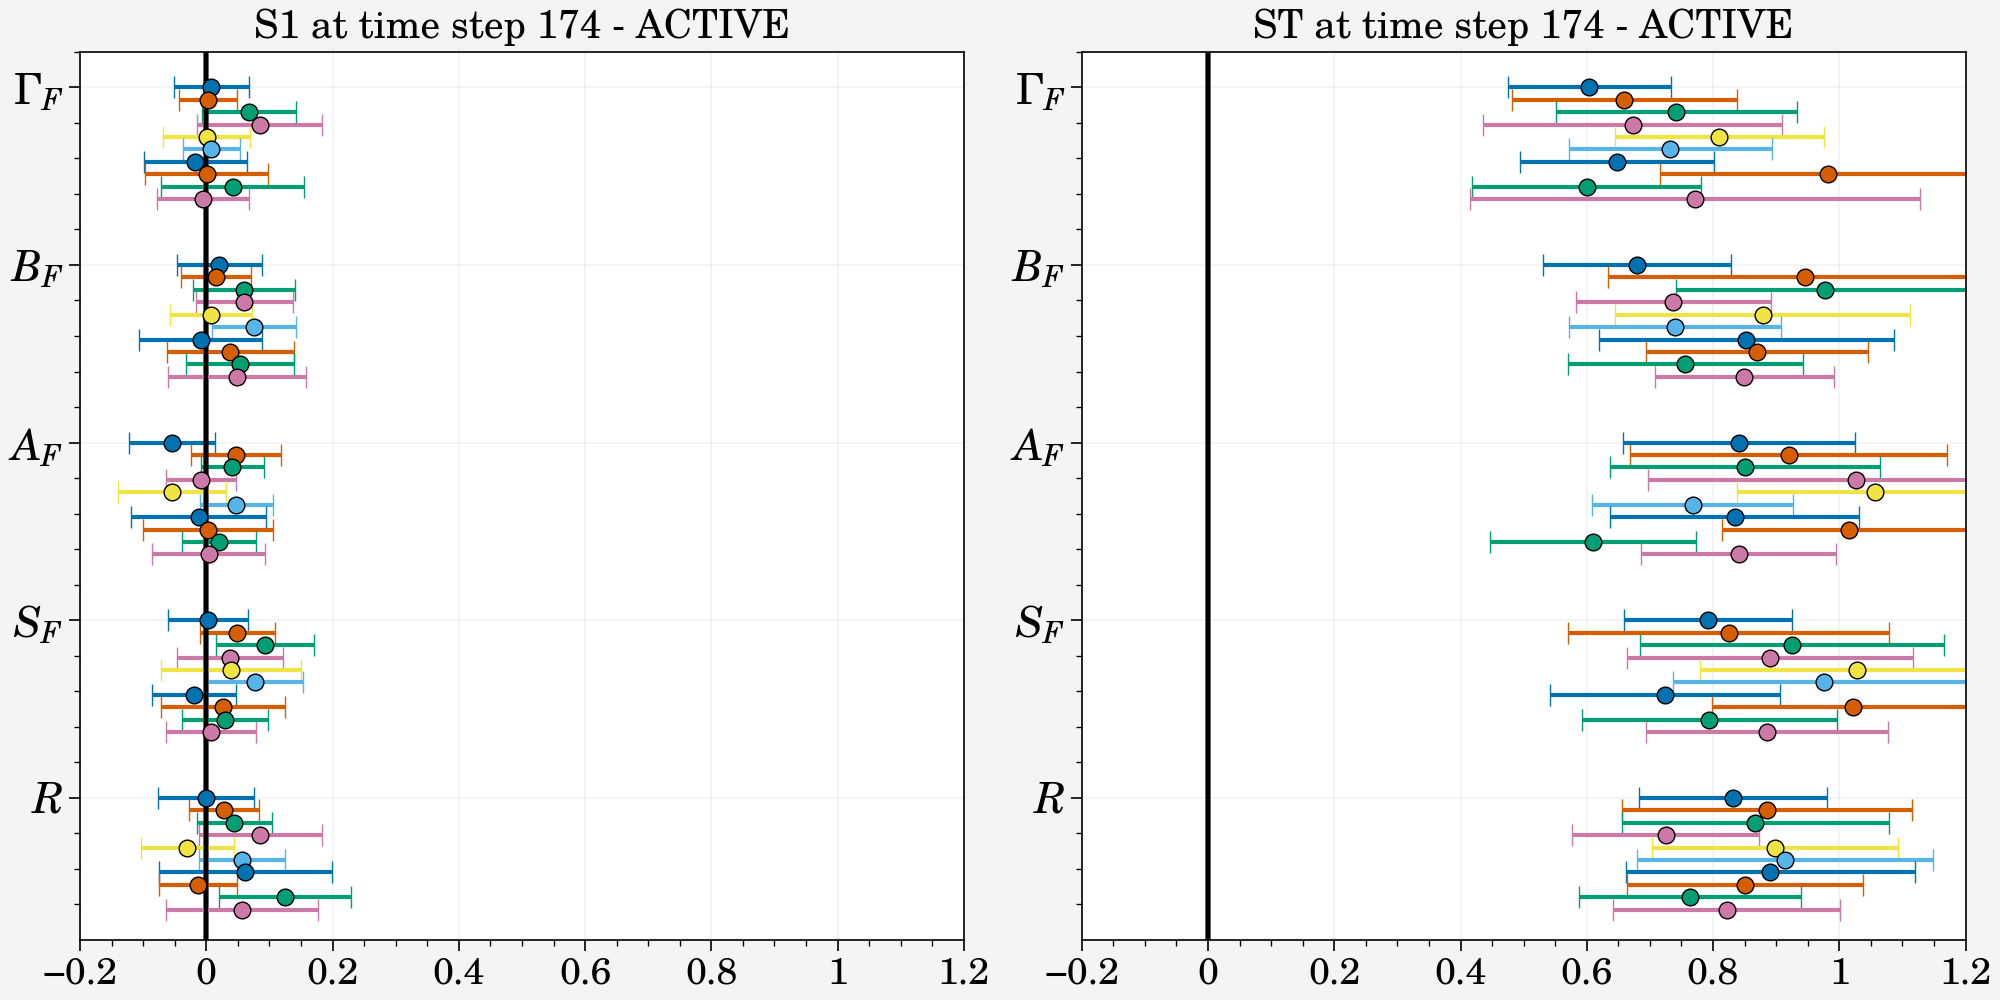

In [46]:
response = 'ACTIVE'

for ts in timesteps:
    plot_multiple_res_multiple_ts(response, ts)

In [18]:
timesteps = np.linspace(24, num_steps-6, 6, dtype=int)
print(timesteps)

[ 24  54  84 114 144 174]


In [19]:
7168*20

143360

In [20]:
# Combining results into 7168*20 by 5 responses 
results_combined_ts = {}

for ts in timesteps:
    results_combined = []
    for ix in range(num_samples):    
        for run in range(num_runs):
            results_combined.append(results_all[:, :, :, ts][run][ix])
    results_combined_ts[ts] = np.asarray(results_combined)
    

Si_all_combined_ts ={}
for ts in timesteps:
    Si_all_combined = {}
    for i, res in enumerate(response_vars):
        
        print(' ')
        print('Time step:', ts)
        print('Model output:', res)
        Si_all_combined[res] = sobol.analyze(problem, 
                                             results_combined_ts[ts][:,i], 
                                             calc_second_order=False, 
                                             print_to_console=True, 
                                             seed=546)
    Si_all_combined_ts[ts] = Si_all_combined

 
Time step: 24
Model output: SUSCEPTIBLE
                               ST   ST_conf
R                        0.146625  0.025052
SFSusceptibility_Scalar  0.162099  0.029023
SFInfector_Scalar        0.222782  0.045407
B_n_Scalar               0.246113  0.044874
lam_gamma_Scalar         0.258352  0.043508
                               S1   S1_conf
R                        0.058184  0.050267
SFSusceptibility_Scalar  0.057640  0.054668
SFInfector_Scalar        0.124425  0.073913
B_n_Scalar               0.163806  0.074295
lam_gamma_Scalar         0.137034  0.059690
 
Time step: 24
Model output: HOSPITALIZED
                               ST   ST_conf
R                        0.495943  0.033019
SFSusceptibility_Scalar  0.520372  0.029292
SFInfector_Scalar        0.522752  0.045558
B_n_Scalar               0.541241  0.030462
lam_gamma_Scalar         0.545554  0.037353
                               S1   S1_conf
R                        0.024391  0.038837
SFSusceptibility_Scalar  0.021106  

                               ST   ST_conf
R                        0.079159  0.004496
SFSusceptibility_Scalar  0.085560  0.004350
SFInfector_Scalar        0.106105  0.005293
B_n_Scalar               0.136942  0.006007
lam_gamma_Scalar         0.168514  0.007195
                               S1   S1_conf
R                        0.047151  0.004784
SFSusceptibility_Scalar  0.054349  0.004868
SFInfector_Scalar        0.076080  0.005341
B_n_Scalar               0.106098  0.006270
lam_gamma_Scalar         0.138358  0.007614
 
Time step: 114
Model output: HOSPITALIZED
                               ST   ST_conf
R                        0.355687  0.016487
SFSusceptibility_Scalar  0.384394  0.017739
SFInfector_Scalar        0.408869  0.019058
B_n_Scalar               0.433550  0.020126
lam_gamma_Scalar         0.475514  0.021758
                               S1   S1_conf
R                        0.025000  0.019829
SFSusceptibility_Scalar  0.054097  0.022800
SFInfector_Scalar        0.08816

In [47]:
# Combining results into 7168*20 by 5 responses with reshape
results_combined_ts = {}

for ts in timesteps: 
    results_combined_ts[ts] = results_all[:, :, :, ts].reshape(7168*20, 5)

Si_all_combined_ts ={}
for ts in timesteps:
    Si_all_combined = {}
    for i, res in enumerate(response_vars):
        
        print(' ')
        print('Time step:', ts)
        print('Model output:', res)
        Si_all_combined[res] = sobol.analyze(problem, 
                                             results_combined_ts[ts][:,i], 
                                             calc_second_order=False, 
                                             print_to_console=True, 
                                             seed=546)
    Si_all_combined_ts[ts] = Si_all_combined

 
Time step: 24
Model output: SUSCEPTIBLE
                               ST   ST_conf
R                        0.706343  0.055918
SFSusceptibility_Scalar  0.638624  0.057837
SFInfector_Scalar        0.692261  0.079580
B_n_Scalar               0.400600  0.060114
lam_gamma_Scalar         0.547560  0.078192
                               S1   S1_conf
R                        0.052939  0.005564
SFSusceptibility_Scalar  0.060173  0.008891
SFInfector_Scalar        0.051301  0.008757
B_n_Scalar               0.018748  0.004569
lam_gamma_Scalar         0.043644  0.009414
 
Time step: 24
Model output: HOSPITALIZED
                               ST   ST_conf
R                        0.736765  0.036775
SFSusceptibility_Scalar  0.711405  0.038808
SFInfector_Scalar        0.724194  0.048204
B_n_Scalar               0.589677  0.047527
lam_gamma_Scalar         0.638009  0.038591
                               S1   S1_conf
R                        0.075280  0.013525
SFSusceptibility_Scalar  0.064299  

                               ST   ST_conf
R                        0.429489  0.009882
SFSusceptibility_Scalar  0.361064  0.009251
SFInfector_Scalar        0.346577  0.008496
B_n_Scalar               0.158457  0.005522
lam_gamma_Scalar         0.063593  0.003375
                               S1   S1_conf
R                        0.287691  0.012464
SFSusceptibility_Scalar  0.239874  0.012679
SFInfector_Scalar        0.235365  0.011759
B_n_Scalar               0.058626  0.006591
lam_gamma_Scalar         0.012547  0.005002
 
Time step: 174
Model output: HOSPITALIZED
                               ST   ST_conf
R                        0.845231  0.035806
SFSusceptibility_Scalar  0.889227  0.042225
SFInfector_Scalar        0.878869  0.042774
B_n_Scalar               0.832235  0.048244
lam_gamma_Scalar         0.704173  0.038351
                               S1   S1_conf
R                        0.023202  0.018937
SFSusceptibility_Scalar  0.013951  0.016174
SFInfector_Scalar       -0.00641

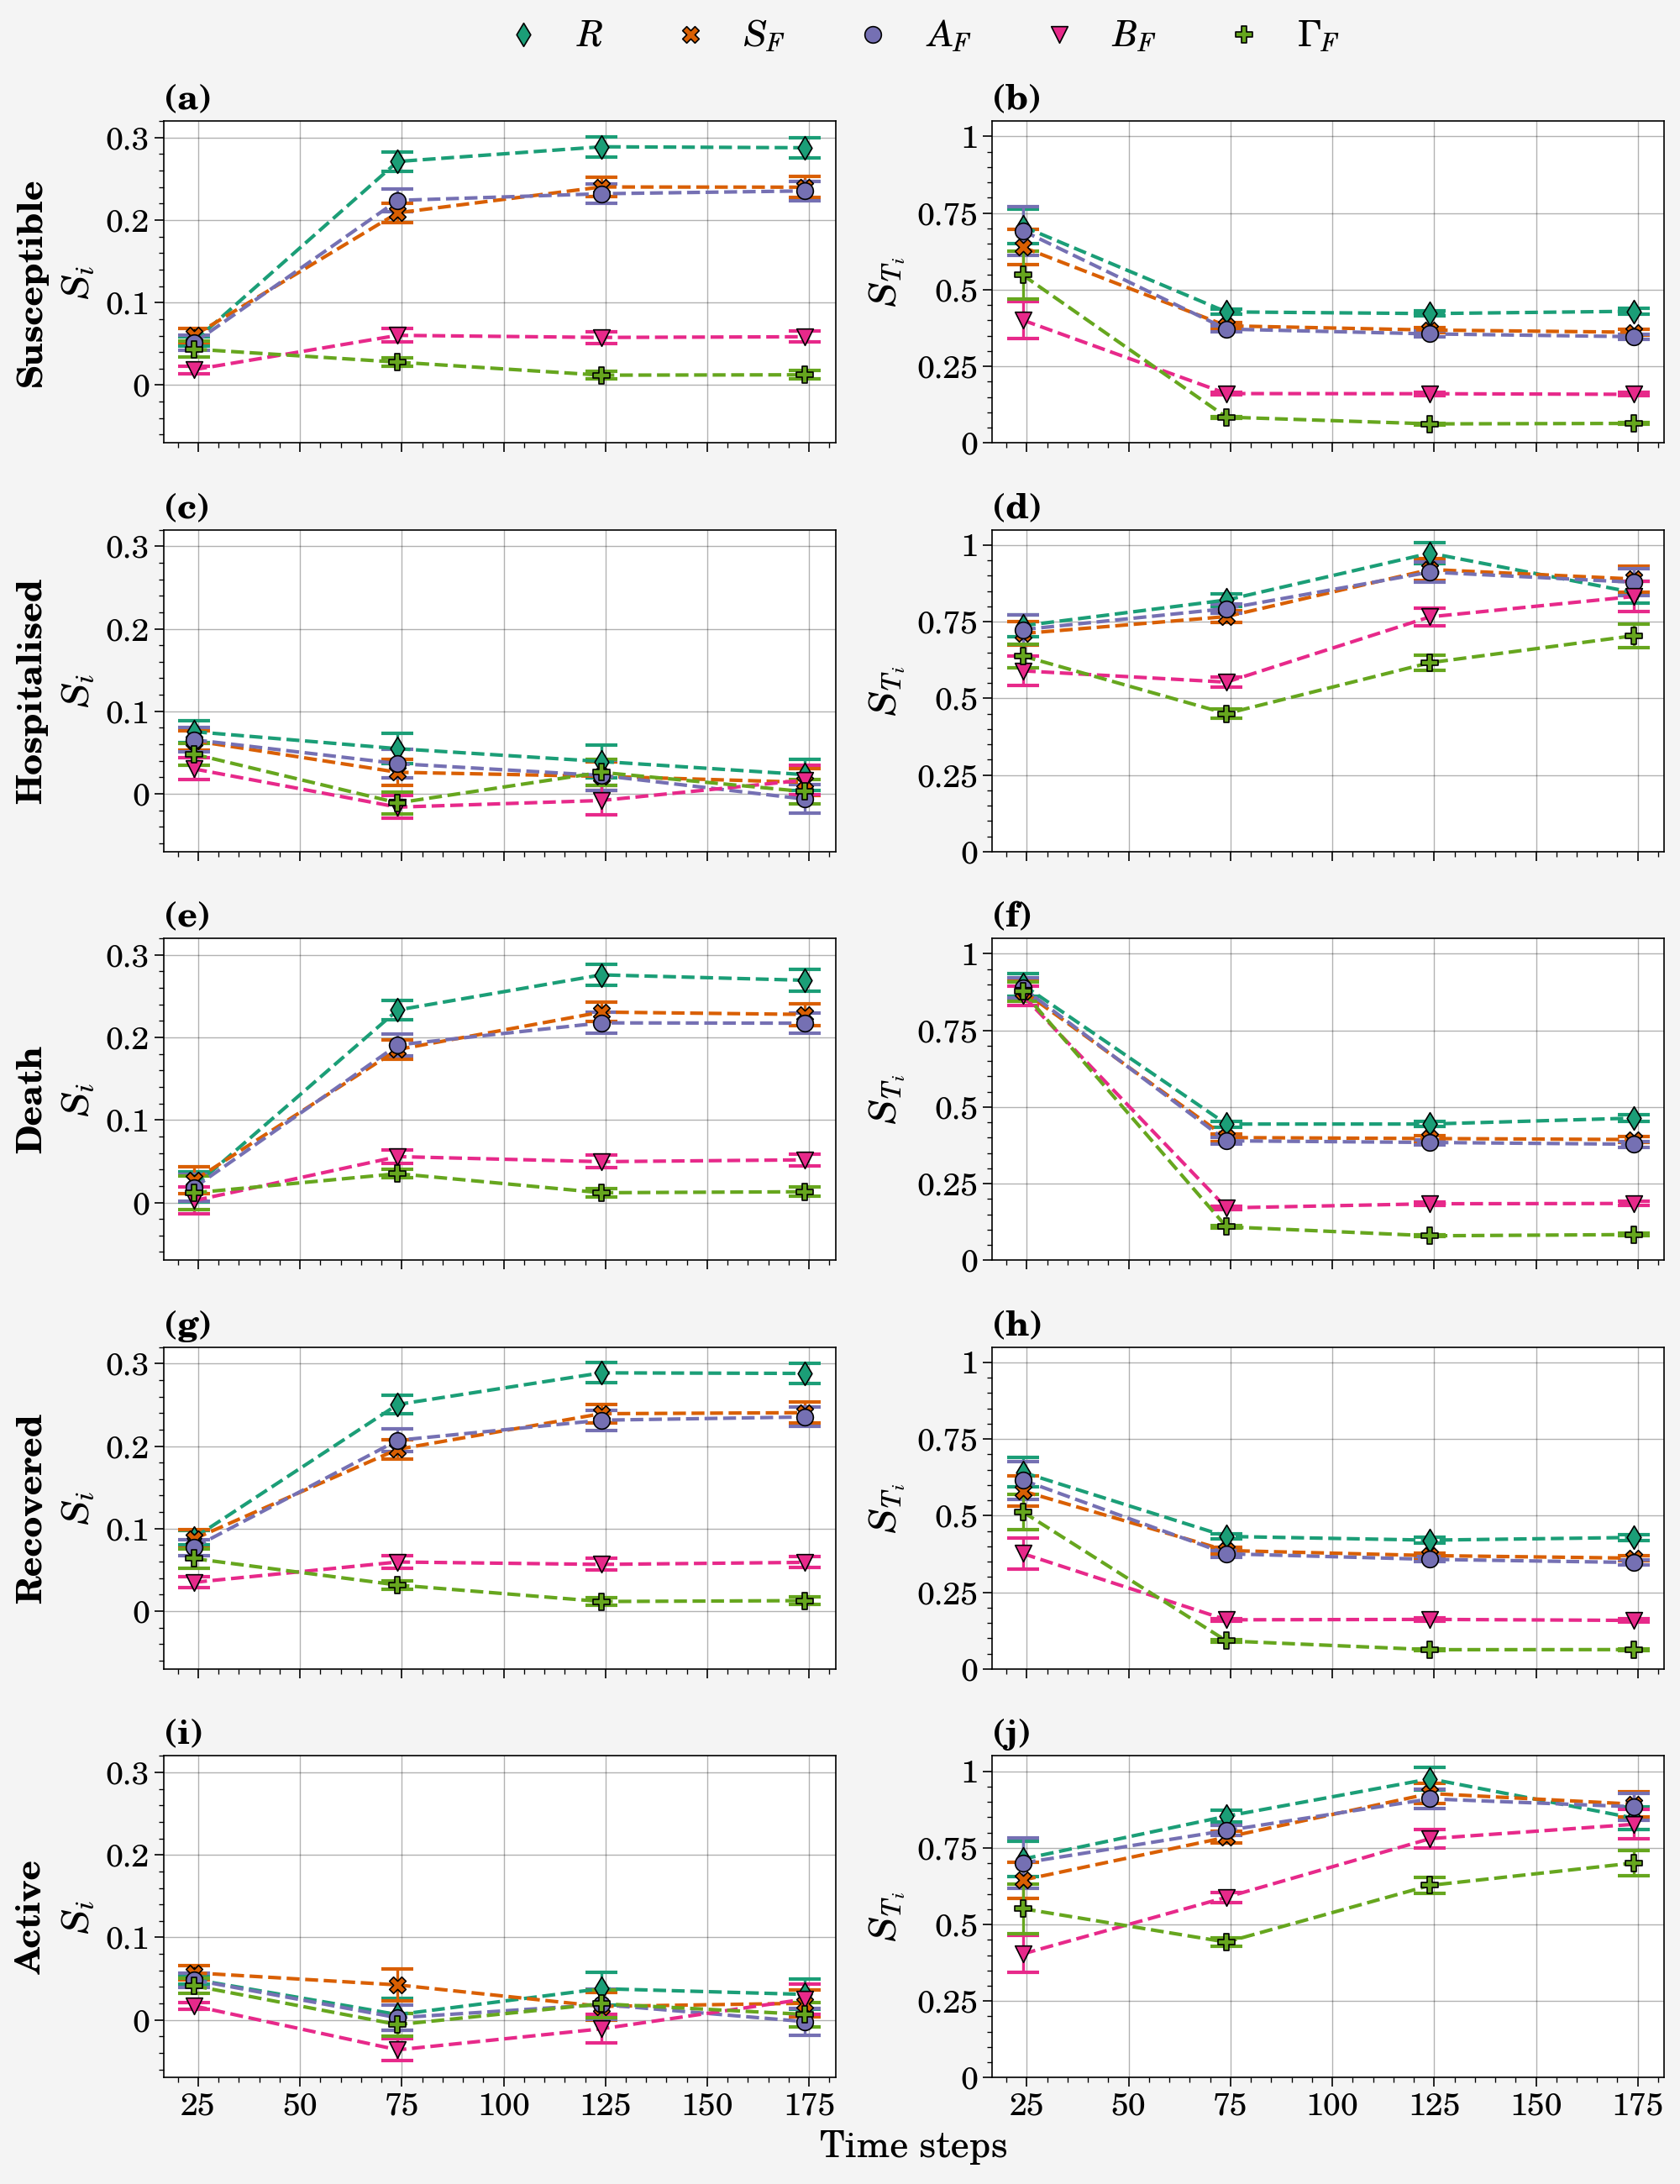

In [113]:
pplt.rc['grid.linewidth'] = 0.5
pplt.rc['grid.alpha'] = 0.3
pplt.rc['axes.labelsize'] = 16

error_marker_styles = ['d', 'X','o', 'v', 'P', 's', '*']
colors=mcp.gen_color(cmap="Dark2",n=9)

fig, axs = pplt.subplots(ncols=2, nrows=5, figsize=(10, 13), sharex=True, sharey=False)

col1 = np.linspace(0, 8, 5, dtype='int')
col2 = np.linspace(1, 9, 5, dtype='int')

for res_ind, res in enumerate(response_vars):
    ls = []
    for i, param in enumerate(problem['names']):
        S1_at_ts = [Si_all_combined_ts[ts][res]['S1'][i] for ts in timesteps]
        S1_errors   = [Si_all_combined_ts[ts][res]['S1_conf'][i] for ts in timesteps]

        ST_at_ts = [Si_all_combined_ts[ts][res]['ST'][i] for ts in timesteps]
        ST_errors   = [Si_all_combined_ts[ts][res]['ST_conf'][i] for ts in timesteps]

        l = axs[col1[res_ind]].scatter(timesteps, S1_at_ts, color=colors[i],
                                       label=param_names_short[param], edgecolor='k', 
                                       marker=error_marker_styles[i], 
                                       markersize=50, zorder=3)       
        axs[col1[res_ind]].errorbar(timesteps, S1_at_ts, S1_errors, color=colors[i],
                                    markeredgewidth=1.5, linestyle='--', 
                                    capsize=7, alpha=1, elinewidth=1.2)  
        axs[col1[res_ind]].format(ylabel=r'$S_{i}$', ylim=(-0.07, 0.32))
        
        axs[col2[res_ind]].scatter(timesteps, ST_at_ts, color=colors[i],
                                   label=param_names_short[param], edgecolor='k', 
                                   marker=error_marker_styles[i], 
                                   markersize=50, zorder=3)       
        axs[col2[res_ind]].errorbar(timesteps, ST_at_ts, ST_errors, color=colors[i],
                                    markeredgewidth=1.5, linestyle='--', 
                                    capsize=7, alpha=1, elinewidth=1.2) 
        axs[col2[res_ind]].format(ylabel=r'$S_{T_i}$',  ylim=(-0, 1.05))
        
        ls.append(l)

axs.format(abc='(a)', xlabel='Time steps', leftlabels=['Hospitalised' if var == 'HOSPITALIZED' \
                       else var.title() for i, var in enumerate(response_vars)])
 
fig.legend(ls, param_names_short.values(), ncols=5, frame=False, loc='t',
           fontsize = 15, title_fontsize=15.5)

plt.savefig('plots/DeepABM_SALib_ts.pdf', bbox_inches='tight')
plt.show()

response: SUSCEPTIBLE


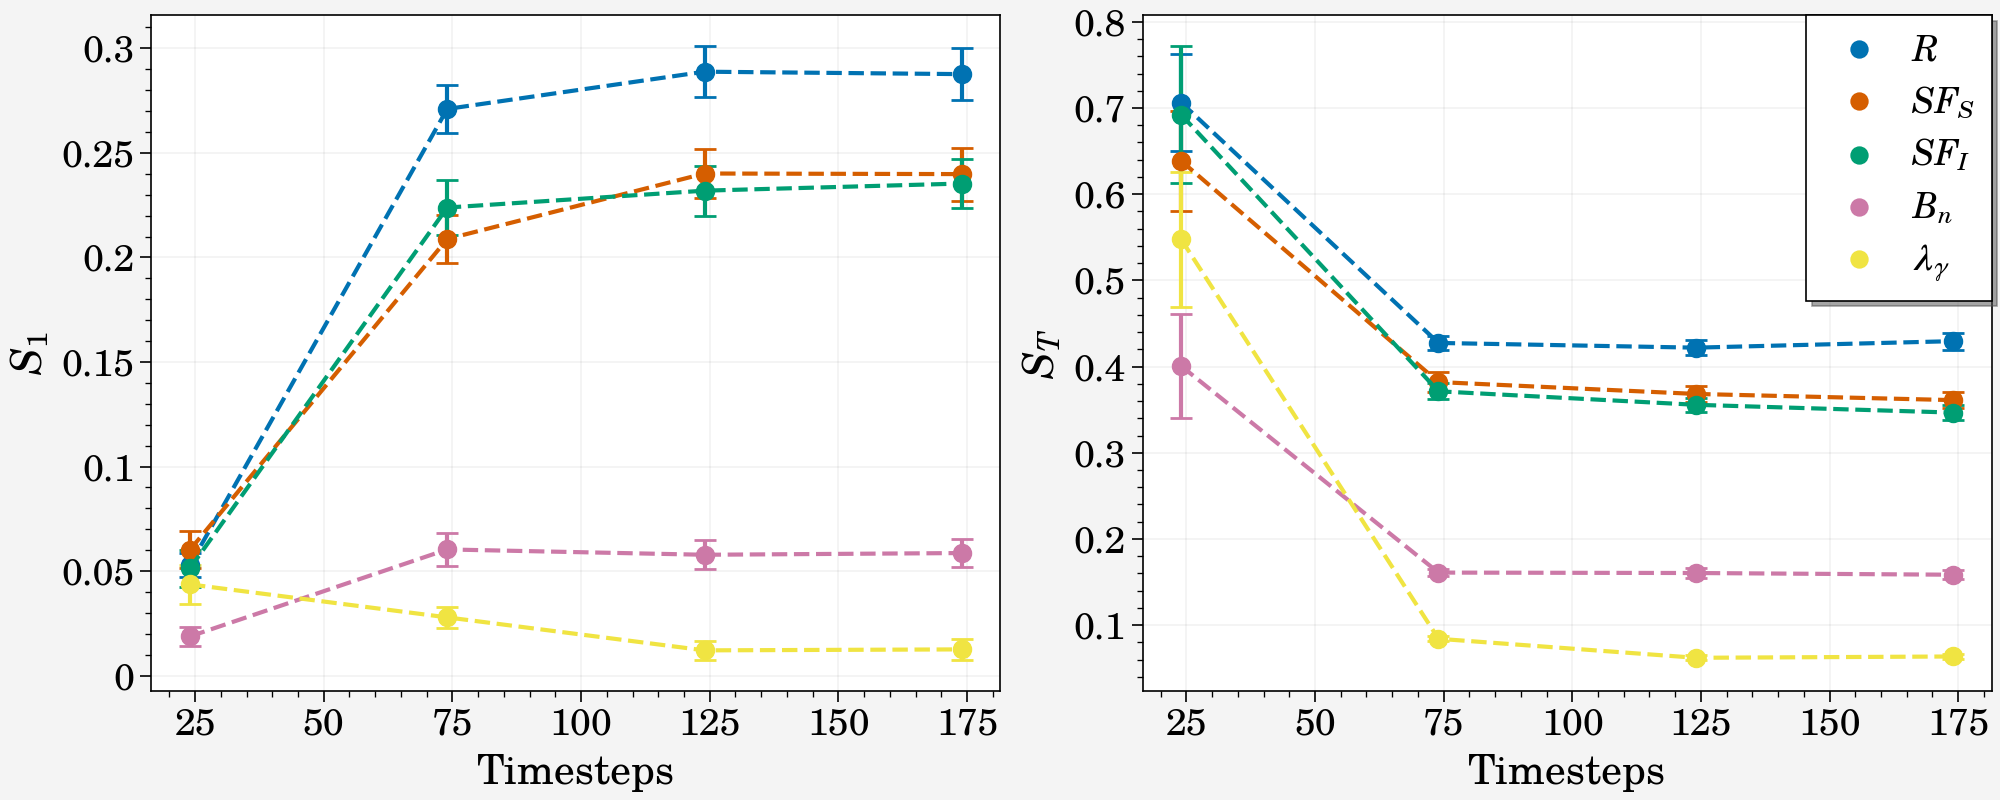

response: HOSPITALIZED


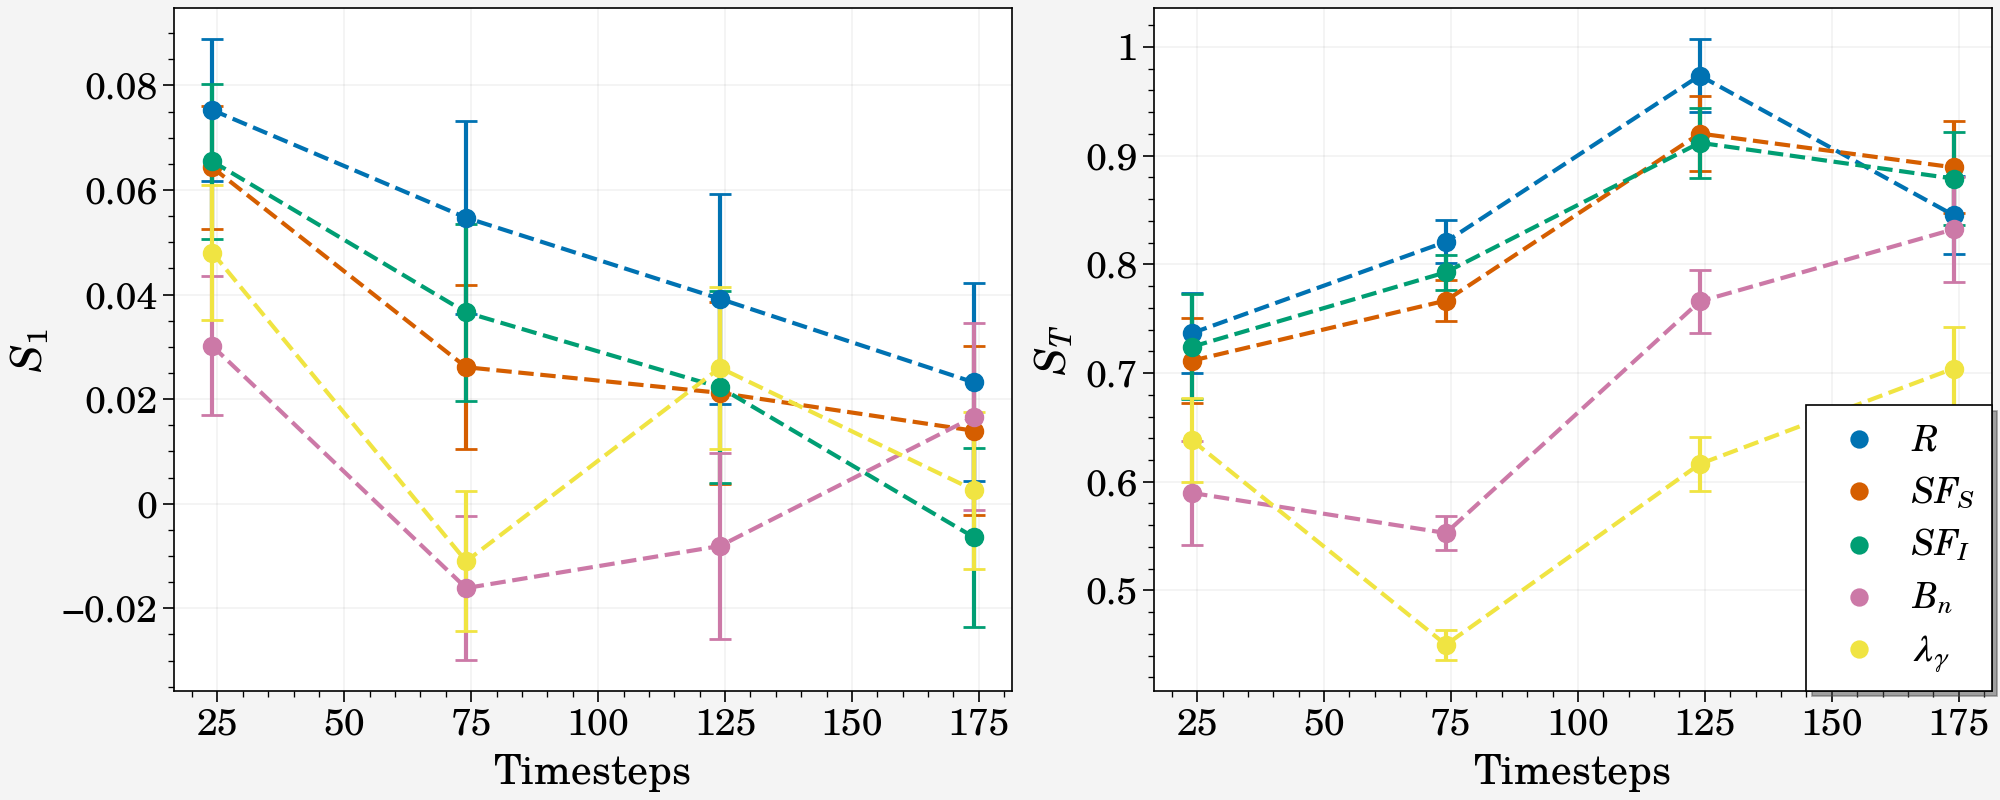

response: DEATH


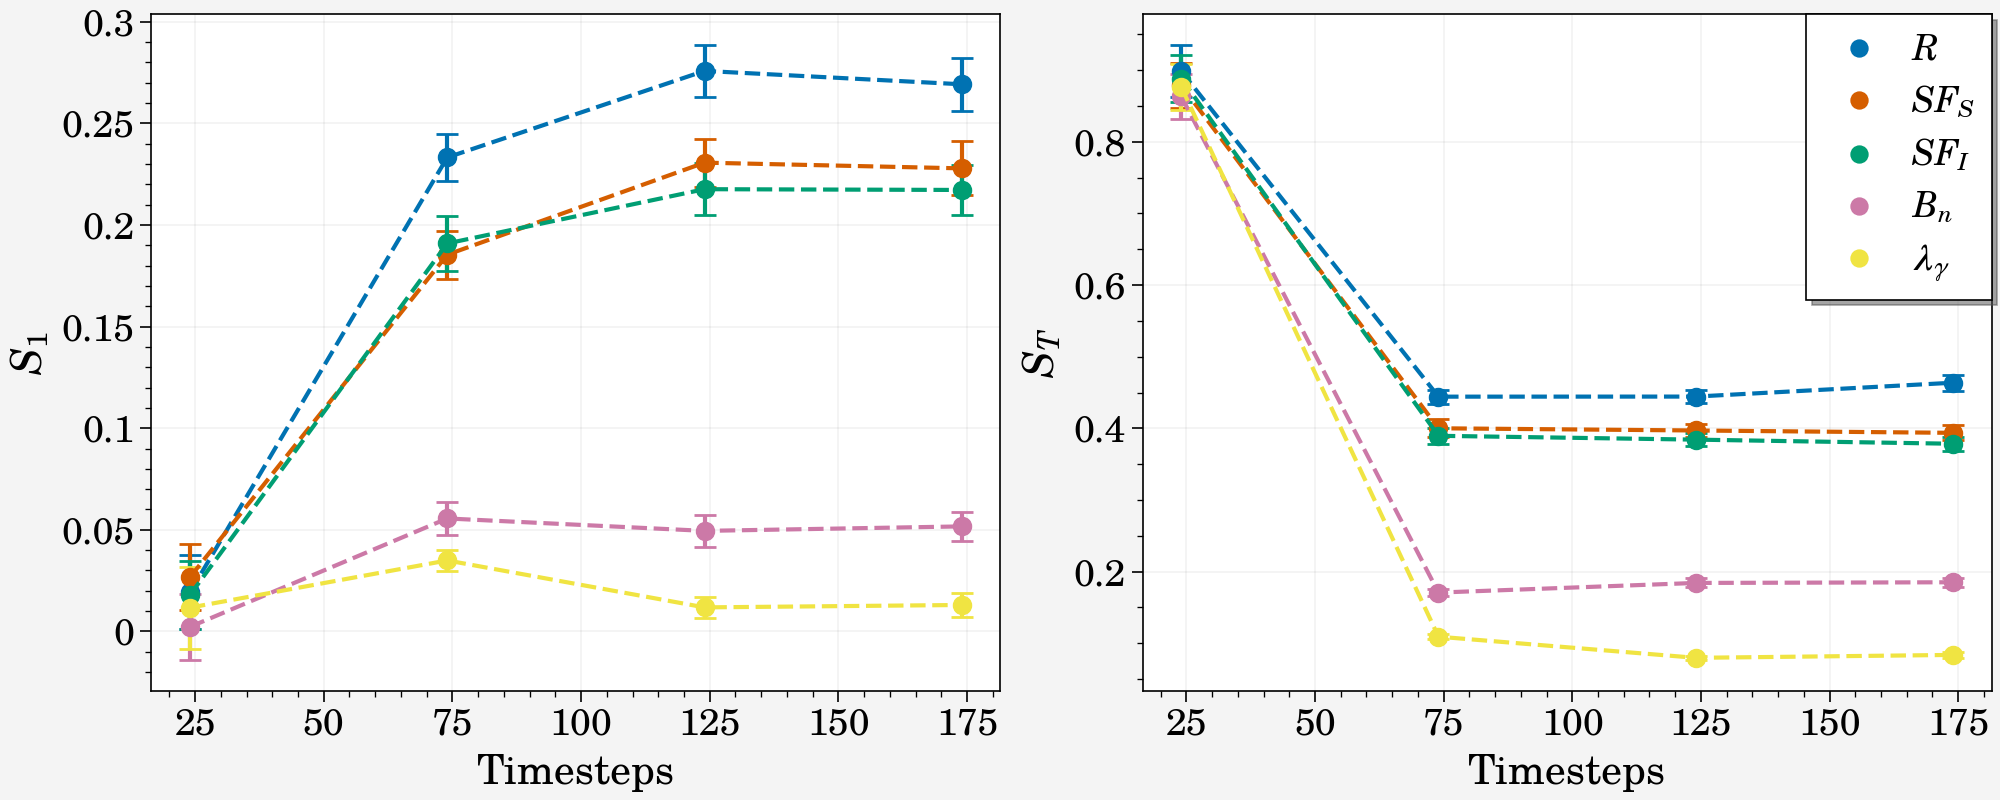

response: RECOVERED


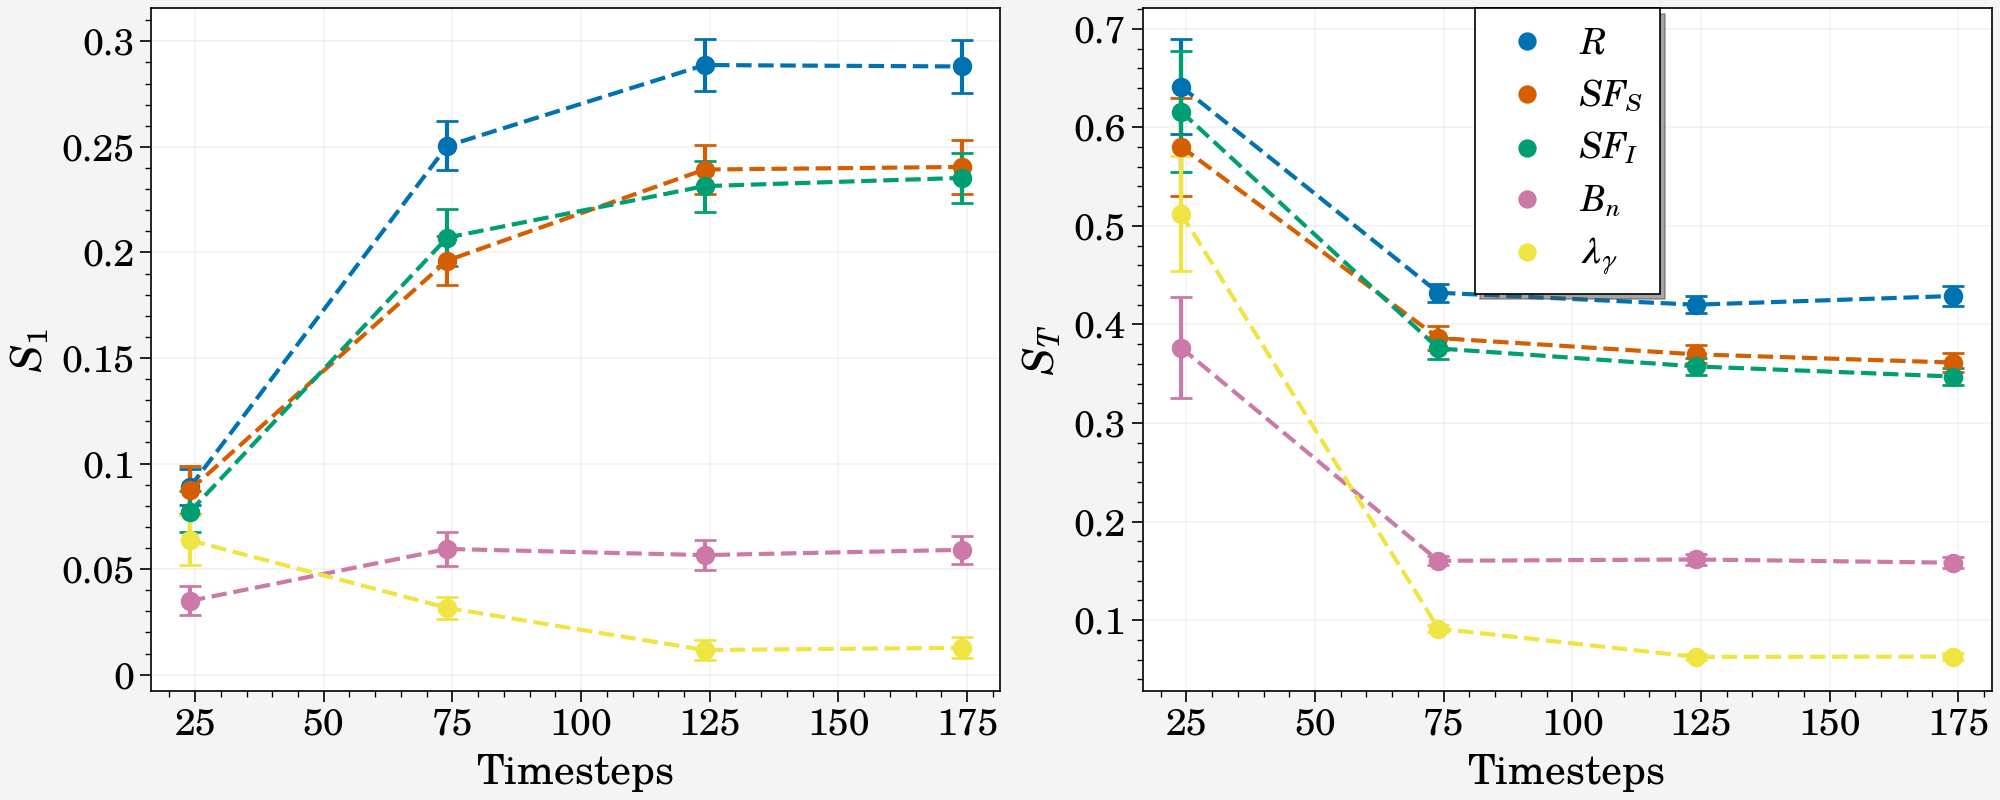

response: ACTIVE


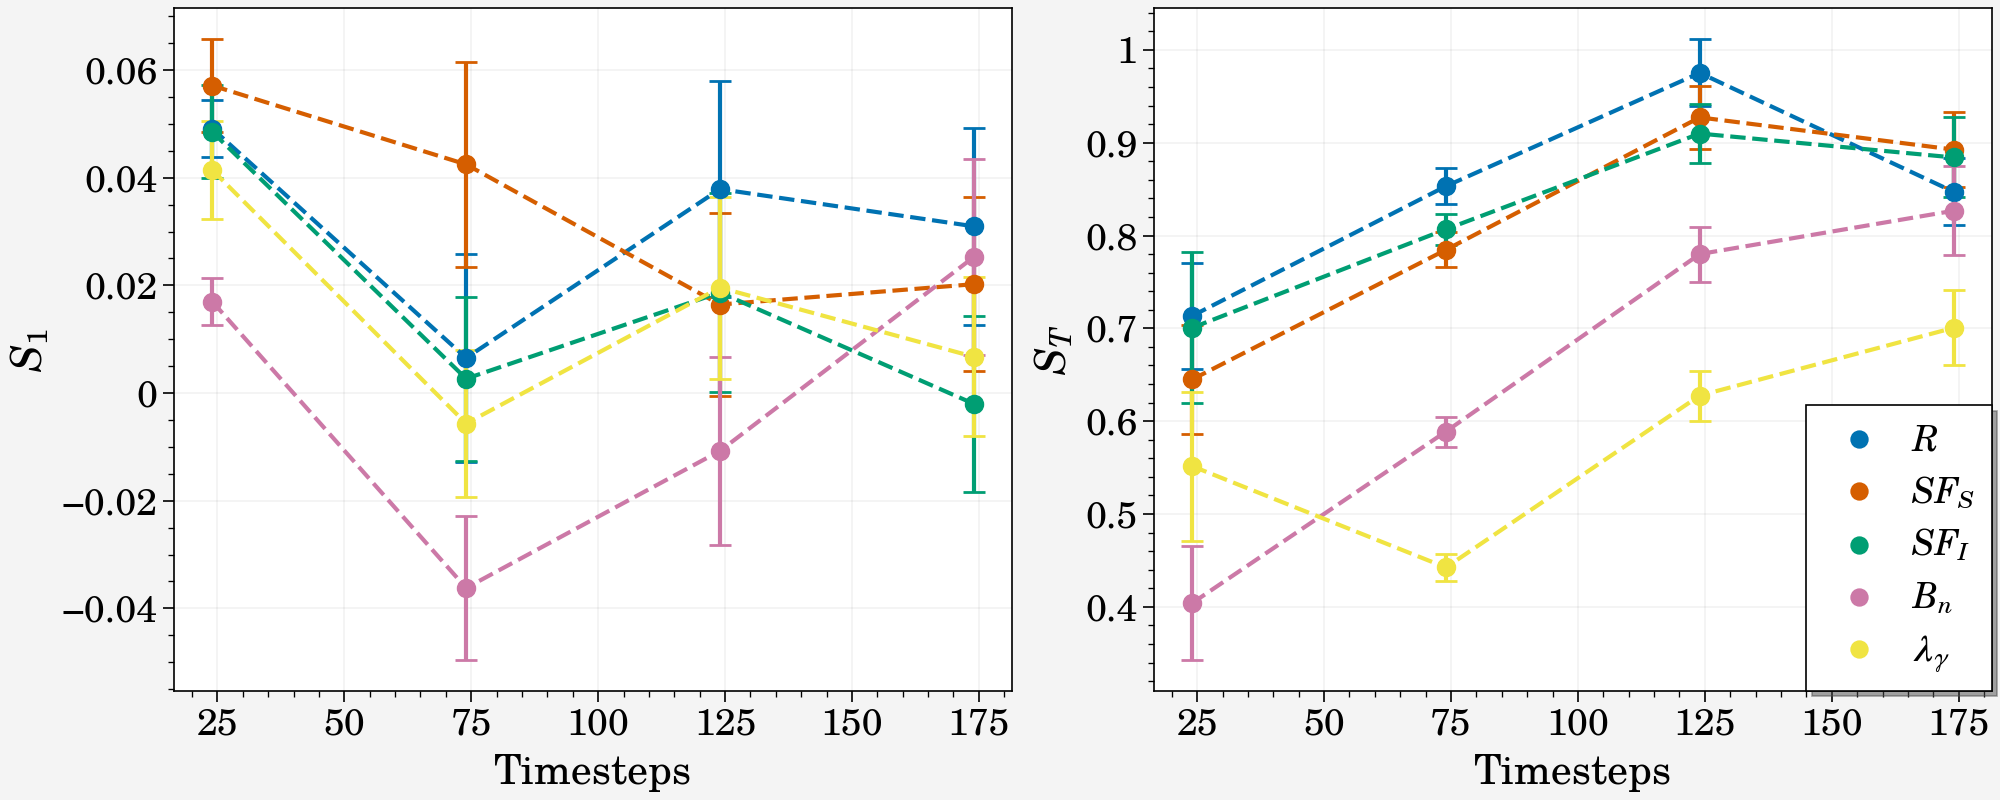

In [20]:
for res_ind, res in enumerate(response_vars):
    print(f'response: {res}')
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

    for i, param in enumerate(problem['names']):
        S1_at_ts = [Si_all_combined_ts[ts][res]['S1'][i] for ts in timesteps]
        S1_errors   = [Si_all_combined_ts[ts][res]['S1_conf'][i] for ts in timesteps]

        ST_at_ts = [Si_all_combined_ts[ts][res]['ST'][i] for ts in timesteps]
        ST_errors   = [Si_all_combined_ts[ts][res]['ST_conf'][i] for ts in timesteps]


        axs[0].scatter(timesteps, S1_at_ts, 
                    label=param_names_short[param])
        axs[0].errorbar(timesteps, S1_at_ts, S1_errors,
                    linestyle='--', marker='o', capsize=4)

        axs[1].scatter(timesteps, ST_at_ts, 
                    label=param_names_short[param])
        axs[1].errorbar(timesteps, ST_at_ts, ST_errors,
                    linestyle='--', marker='o', capsize=4)

        for ax in axs:
            ax.set(xlabel='Timesteps')
    axs[0].set(ylabel=r'$S_1$')
    axs[1].set(ylabel=r'$S_T$')
    plt.suptitle(res, y=1.05);

    plt.legend(shadow=True)
    plt.show()